# Airbnb Listings Data Analysis - Seville (Spain)

Airbnb operates as an online intermediary by connecting property owners who want to rent their places with those looking for accommodation. These accommodations can be very diverse, from rooms to entire apartments, and can be booked for short-term rentals. Guests can check out these properties, compare prices, read reviews and book them. All with just one click through the website or the application.

[Inside Airbnb](https://insideairbnb.com/) provides access to data from the most important cities globally. These could be used for projects.

In this notebook, we will be working with a summarized dataset of Seville (Spain) that includes information on hosts, prices, room types, rental periods, reviews, locations, and availability. The aim is to extract insights to improve property management strategies and profitability. 

To achieve this, we will follow seven steps:
1. Loading
2. Data Understanding
3. Data Cleaning
4. Feature Engineering
5. Data Analysis
6. Insights and Recommendations
7. Assumptions and Caveats

By: Andrea López

## 1. Loading

### 1.1. Loading libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

### 1.2. Loading data

In [3]:
file_dir = '...' # Add directory path
file_name = '...' # Add file path

df = pd.read_csv(file_dir+file_name)

## 2. Data Undertanding

### 2.1. Dataset Size

First, we examine the number of rows and variables in the dataset to grasp its size. Next, we review each variable to understand their characteristics and data types.

In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7885 entries, 0 to 7884
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7885 non-null   int64  
 1   name                            7885 non-null   object 
 2   host_id                         7885 non-null   int64  
 3   host_name                       7885 non-null   object 
 4   neighbourhood_group             7885 non-null   object 
 5   neighbourhood                   7885 non-null   object 
 6   latitude                        7885 non-null   float64
 7   longitude                       7885 non-null   float64
 8   room_type                       7885 non-null   object 
 9   price                           7359 non-null   float64
 10  minimum_nights                  7885 non-null   int64  
 11  number_of_reviews               7885 non-null   int64  
 12  last_review                     71

The DataFrame consists of:

- 18 variables
- 7885 rows
- 3 types of variables:
    - Numerical:
        - Integer (7)
        - Float (4)
    - Categorical:
        - Object (7)


The dataset contains information and metrics for accommodations. Below, we can find each variable along with their description:
- **'id'**: Airbnb's unique identifier for the listing;
- **'name'**: Name of the listing;
- **'host_id'**: Airbnb's unique identifier for the host/user;
- **'host_name'**: Name of the host. Usually just the first name(s);
- **'neighbourhood_group'**: This column does not contain any valid/reported values;
- **'neighbourhood'**: Name of the neighborhood where the property is located;
- **'latitude'**: Property latitude coordinate using the World Geodetic System (WGS84) projection;
- **'longitude'**: Property longitude coordinate using the World Geodetic System (WGS84) projection;
- **'room_type'**: Informs the type of room/rental type offered by the host;
- **'price'**: Daily price in local currency. NOTE: the $ sign is a technical artifact of the export, please ignore it;
- **'minimum_nights'**: Minimum number of night stay for the listing (calendar rules may be different);
- **'number_of_reviews'**: The number of reviews the listing has;
- **'last_review'**: The date of the last/newest review;
- **'reviews_per_month'**: The average number of reviews per month the listing has over the lifetime of the listing;
- **'calculated_host_listings_count'**: The number of listings the host has in the current scrape, in the city/region geography;
- **'availability_365'**: The availability of the listing 365 days in the future as determined by the calendar. Note a listing may not be available because it has been booked by a guest or blocked by the host;
- **'number_of_reviews_ltm'**: The number of reviews the listing has (in the last 12 months);
- **'license'**: The licence/permit/registration number.

There are 18 variables that provide enough amount of information for data exploration. We see three variables that need to be converted to object and datetime, as well as some missing values, which will require cleaning and handling of missing values.

### 2.2. Dataset Visualization

Before performing an analysis, we will start by examining the dataset displaying the first five entries.

In [5]:
df.head().T

,0,1,2,3,4
id,32347,49287,108236,111140,116703
name,SevillaCenter,BEAUTIFUL APARTMENT IN SEVILLE,Sunny apt in heart of seville!!,Quiet&historicenter&local experienc,"Walk to the Cathedral!! ATICO DUPLEX, WIFI."
host_id,139939,224697,560040,560040,589600
host_name,Alejandro,Walter,Pepe,Pepe,Miguel
neighbourhood_group,Casco Antiguo,Casco Antiguo,Casco Antiguo,Casco Antiguo,Casco Antiguo
neighbourhood,San Vicente,San Lorenzo,San Vicente,San Vicente,Arenal
latitude,37.39358,37.39898,37.396858,37.395924,37.38551
longitude,-5.99975,-5.99533,-5.999127,-5.999317,-5.99497
room_type,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt
price,99.0,80.0,118.0,83.0,77.0


The values ​​corresponding to the rental/daily price for registered properties must be considered in local currency. For Seville, we will consider the Euro.

### 2.3. Descriptive Statistics

Additionally, we examine the descriptive statistics of the numerical variables to gain an overview of the data, understand its distribution and characteristics, and assess the amount of work required.

In [6]:
df.describe(exclude='number').T

,count,unique,top,freq
name,7885,7689,Cruz de San Andres Apartments,8
host_name,7885,1223,Nacho,245
neighbourhood_group,7885,11,Casco Antiguo,5381
neighbourhood,7885,105,Alfalfa,859
room_type,7885,4,Entire home/apt,6622
last_review,7168,705,2024-06-23,494
license,7711,5366,Exempt,482


In [7]:
df.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
id,7885.0,4.248452e+17,4.693433e+17,32347.000000,2.997564e+07,5.276972e+07,8.883513e+17,1.189233e+18
host_id,7885.0,1.911694e+08,1.780697e+08,139939.000000,3.142092e+07,1.348641e+08,3.306040e+08,5.863134e+08
latitude,7885.0,3.739023e+01,9.430758e-03,37.318174,3.738609e+01,3.739008e+01,3.739572e+01,3.743320e+01
longitude,7885.0,-5.990763e+00,1.220904e-02,-6.014914,-5.997457e+00,-5.992300e+00,-5.986833e+00,-5.899827e+00
price,7359.0,1.358827e+02,3.852131e+02,10.000000,6.300000e+01,8.600000e+01,1.220000e+02,1.723700e+04
minimum_nights,7885.0,3.136462e+00,1.185516e+01,1.000000,1.000000e+00,2.000000e+00,2.000000e+00,3.650000e+02
number_of_reviews,7885.0,7.259062e+01,1.108579e+02,0.000000,5.000000e+00,2.800000e+01,9.200000e+01,1.157000e+03
reviews_per_month,7168.0,1.953860e+00,1.752313e+00,0.010000,5.800000e-01,1.440000e+00,2.892500e+00,1.525000e+01
calculated_host_listings_count,7885.0,1.760089e+01,3.319227e+01,1.000000,1.000000e+00,5.000000e+00,2.000000e+01,1.860000e+02
availability_365,7885.0,1.758893e+02,1.027888e+02,0.000000,9.000000e+01,1.630000e+02,2.640000e+02,3.650000e+02


### 2.4. Duplicated rows

We examine if there are any duplicated rows.

In [8]:
df.duplicated().sum()

0

### 2.5. Variance

We examine if there are variables with zero variance.

In [9]:
constant_variable = [col for col in df.columns if df[col].nunique(dropna = False) == 1]
constant_variable

[]

### 2.6. Missing Data

We assess the presence of missing values and identify the specific variables affected.

In [10]:
df.isnull().sum()

id                                  0
name                                0
host_id                             0
host_name                           0
neighbourhood_group                 0
neighbourhood                       0
latitude                            0
longitude                           0
room_type                           0
price                             526
minimum_nights                      0
number_of_reviews                   0
last_review                       717
reviews_per_month                 717
calculated_host_listings_count      0
availability_365                    0
number_of_reviews_ltm               0
license                           174
dtype: int64

## 3. Data Cleaning

Removing the 'host_name' variable since it is not relevant for further data exploration.

In [11]:
df = df.drop(['host_name'], axis=1)

#### 3.1. Types of Attributes

Converting the unique identifiers ('id' and 'host_id') from integers to objects, and changing 'last_review' variable  from an object to a datetime format.

In [12]:
df[['id', 'host_id']] = df[['id', 'host_id']].astype(str)

In [13]:
df['last_review'] = pd.to_datetime(df['last_review'])

#### 3.2. Missing Values

After examining the head of the dataset, we noticed some missing values. Therefore, we need to investigate the missing values further before continuing with the analysis.

We can use the 'sum' function to display the percentage of missing values in each variable of the dataset.

- The variables 'last_review' and 'reviews_per_month' are missing 9.09% of their values.
- The variable 'price' has 6.67% of missing values.
- The variable 'license' has 2.21% of missing values.

In [14]:
(round(df.isnull().sum() / df.shape[0] *100,2)).sort_values(ascending=False)

last_review                       9.09
reviews_per_month                 9.09
price                             6.67
license                           2.21
neighbourhood                     0.00
latitude                          0.00
longitude                         0.00
room_type                         0.00
name                              0.00
minimum_nights                    0.00
number_of_reviews                 0.00
neighbourhood_group               0.00
host_id                           0.00
calculated_host_listings_count    0.00
availability_365                  0.00
number_of_reviews_ltm             0.00
id                                0.00
dtype: float64

In [15]:
def analyze_missing_values(df, column_name):
    """
    Analyzes the missing values in a specified column of the DataFrame.

    Parameters:
    - df: pandas DataFrame
    - column_name: str, name of the column to analyze

    Prints:
    - Data type of the column
    - Number of missing values
    - Percentage of missing values
    - Number of unique values
    - Distribution of unique values
    """
    # Data type of the variable:
    dtype = df[column_name].dtype
    print(f'Data type of "{column_name}": {dtype}')
    
    # Calculating and printing the number of missing values:
    missing_values_count = df[column_name].isnull().sum()
    print(f'There are {missing_values_count} missing values.')

    # Calculating and printing the percentage of missing values:
    missing_values_pct = missing_values_count / df.shape[0] * 100
    print(f'The missing values percentage is {missing_values_pct:.2f}%.')

    # Calculating and printing the number of unique values:
    num_unique_values = df[column_name].nunique()
    print(f'There are {num_unique_values} unique values.')

    # Printing the distribution of unique values:
    unique_values = df[column_name].value_counts(ascending=False)
    pd.set_option('display.max_rows', len(unique_values))

In [16]:
analyze_missing_values(df, 'last_review')

Data type of "last_review": datetime64[ns]
There are 717 missing values.
The missing values percentage is 9.09%.
There are 705 unique values.


In [17]:
MIN_DATE = df['last_review'].min()
MAX_DATE = df['last_review'].max()

print(f'First date is {MIN_DATE}.\nLast date is {MAX_DATE}.')

First date is 2012-10-29 00:00:00.
Last date is 2024-06-29 00:00:00.


To handle missing values in the 'last_review' variable, we have chosen to impute these missing entries with an extreme future date (specifically January 1st, 2025) to clearly identify and manage these entries while minimizing their impact on our overall analysis.

In [18]:
# Defining an extreme future date:
future_date = pd.Timestamp('2025-01-01')

# Imputing missing values with the extreme future date:
df = df.fillna({'last_review': '2025-01-01'})

In [19]:
analyze_missing_values(df, 'reviews_per_month')

Data type of "reviews_per_month": float64
There are 717 missing values.
The missing values percentage is 9.09%.
There are 730 unique values.


If there were no review in 'last_reviews' variable, therefore, we need to reflect it in 'reviews_per_month' too. So, we are replacing missing values with zero in 'reviews_per_month' to ensure consistency with 'last_review' variable.

In [20]:
df = df.fillna({'reviews_per_month':0})

In [21]:
analyze_missing_values(df, 'price')

Data type of "price": float64
There are 526 missing values.
The missing values percentage is 6.67%.
There are 503 unique values.


We will replace the missing values in the 'price' variable by grouping the data based on the 'neighbourhood' and 'room_type' variables to determine the median price values within these groups. If missing values remain after this imputation, we will replace them with the general median.

In [22]:
df2 = df.copy()

In [23]:
df2_ = df2.dropna(subset=['price'])

In [24]:
median_price_df = df2_.groupby(['neighbourhood', 'room_type'])['price'].median().reset_index()
median_price_df.rename(columns={'price': 'median_price'}, inplace=True)

In [25]:
df2 = df2.merge(median_price_df, on=['neighbourhood', 'room_type'], how='left')

In [26]:
df2['price'] = df2['price'].fillna(df2['median_price'])

In [27]:
df2['price'].isnull().sum()

26

In [28]:
df2 = df2.drop('median_price', axis=1)

We have missing values after the imputation, so we will replace them with the overall median price.

In [29]:
median_price = df2['price'].median()
df2 = df2.fillna({'price': median_price})

In [30]:
df2['price'].isnull().sum()

0

In [31]:
analyze_missing_values(df2, 'license')

Data type of "license": object
There are 174 missing values.
The missing values percentage is 2.21%.
There are 5366 unique values.


Replacing all NaN values in the 'license' variable with the value 'unknown,' as the missing values represent a unique category that is currently unidentified.

In [32]:
df2 = df2.fillna({'license': 'unknown'})

In [33]:
# Checking there are no more missing values:
(round(df2.isnull().sum() / df2.shape[0] *100,2)).sort_values(ascending=False)

id                                0.0
minimum_nights                    0.0
number_of_reviews_ltm             0.0
availability_365                  0.0
calculated_host_listings_count    0.0
reviews_per_month                 0.0
last_review                       0.0
number_of_reviews                 0.0
price                             0.0
name                              0.0
room_type                         0.0
longitude                         0.0
latitude                          0.0
neighbourhood                     0.0
neighbourhood_group               0.0
host_id                           0.0
license                           0.0
dtype: float64

In [34]:
# Observing the changes:
df2.head()

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,32347,SevillaCenter,139939,Casco Antiguo,San Vicente,37.393580,-5.999750,Entire home/apt,99.0,2,167,2020-01-08,1.02,1,2,0,CTC-2018150852
1,49287,BEAUTIFUL APARTMENT IN SEVILLE,224697,Casco Antiguo,San Lorenzo,37.398980,-5.995330,Entire home/apt,80.0,3,39,2020-02-17,0.24,1,161,0,VFT/SE/01116
2,108236,Sunny apt in heart of seville!!,560040,Casco Antiguo,San Vicente,37.396858,-5.999127,Entire home/apt,118.0,2,197,2024-06-11,1.23,5,76,18,VFT/SE/05126
3,111140,Quiet&historicenter&local experienc,560040,Casco Antiguo,San Vicente,37.395924,-5.999317,Entire home/apt,83.0,3,51,2024-06-10,0.32,5,32,9,VFT/SE/08197
4,116703,"Walk to the Cathedral!! ATICO DUPLEX, WIFI.",589600,Casco Antiguo,Arenal,37.385510,-5.994970,Entire home/apt,77.0,3,271,2024-06-17,1.71,9,321,31,unknown


#### 3.3. Outliers

Histograms are crucial for visualizing the distribution of each variable and identifying outliers.

array([[<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'minimum_nights'}>,
        <Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'last_review'}>],
       [<Axes: title={'center': 'reviews_per_month'}>,
        <Axes: title={'center': 'calculated_host_listings_count'}>,
        <Axes: title={'center': 'availability_365'}>],
       [<Axes: title={'center': 'number_of_reviews_ltm'}>, <Axes: >,
        <Axes: >]], dtype=object)

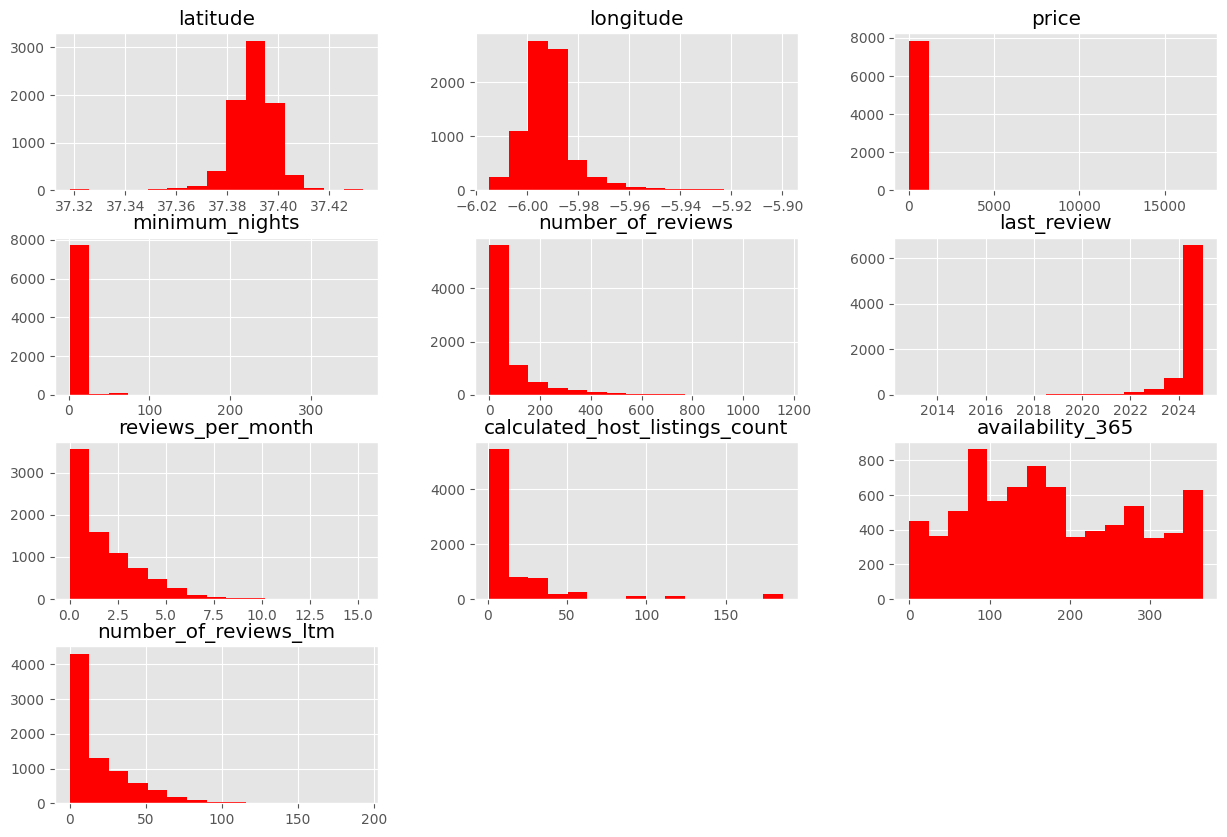

In [35]:
df2.hist(bins=15, figsize=(15,10), color='red')

We will use the describe() method in order to show the statistics of the key numerical variables.\
Excluding variables such as 'latitude' and 'longitude' from consideration.

In [36]:
df2[['price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].describe().round(2).T

,count,mean,min,25%,50%,75%,max,std
price,7885.0,132.08,10.0,63.0,85.0,119.0,17237.0,372.45
minimum_nights,7885.0,3.14,1.0,1.0,2.0,2.0,365.0,11.86
number_of_reviews,7885.0,72.59,0.0,5.0,28.0,92.0,1157.0,110.86
last_review,7885,2024-04-03 06:02:19.708306944,2012-10-29 00:00:00,2024-05-04 00:00:00,2024-06-09 00:00:00,2024-06-23 00:00:00,2025-01-01 00:00:00,NaN
reviews_per_month,7885.0,1.78,0.0,0.37,1.22,2.72,15.25,1.76
calculated_host_listings_count,7885.0,17.6,1.0,1.0,5.0,20.0,186.0,33.19
availability_365,7885.0,175.89,0.0,90.0,163.0,264.0,365.0,102.79
number_of_reviews_ltm,7885.0,18.58,0.0,2.0,10.0,29.0,193.0,21.81


Let's examine the 'price' variable.
- The minimum price is 10.0.
- The average price is 132.08.
- And the maximum is 17237.0.

These statistical results may distort our analysis. Therefore, it is necessary to correct the outliers of this variable.

The same happens in the 'minimum_nights' variable.
- The minimum is 1 night.
- The average is 3.14 nights.
- And the maximum value is 365 nights. One complete year.

The distributions of the remaining variables appear logical, with no anomalous data detected.

To identify outliers we will be using the Interquartile Rule (IQR Score).
A dataset can be summarized by its five-number summary:
- The minimum or lowest value of the dataset.
- The first quartile (Q1), which represents the 25th percentile of the data.
- The median of the dataset, which represents the 50th percentile of the data.
- The third quartile (Q3), which represents the 75th percetile of the data.
- The maximum or highest value of the dataset.

This information is essential for identifying patterns and outliers.

Any data point below the lower bound or above the upper bound is considered an outlier.
So, all we have to do is subtract the Q1 from the Q3:\
IQR = Q3 – Q1

We will generate boxplots to analyze the distribution of numerical variables.

In [37]:
def plot_boxplots(df):
    """
    Creates and displays a boxplot for each numerical variable in the DataFrame.

    Parameters:
    - df: pandas DataFrame
    """
    # Identifying numerical variables:
    excluded_columns = ['latitude', 'longitude']
    numerical_columns = df.select_dtypes(include=['number']).columns
    numerical_columns = [col for col in numerical_columns if col not in excluded_columns]

    # Setting up the plotting environment:
    num_plots = len(numerical_columns)
    fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(10, 5 * num_plots))
    
    if num_plots == 1:
        axes = [axes]

    for ax, col in zip(axes, numerical_columns):
        sns.boxplot(x=df[col], ax=ax, color='red')
        ax.set_title(f'Boxplot of {col}')
        ax.set_xlabel(col)

    plt.tight_layout()
    plt.show()

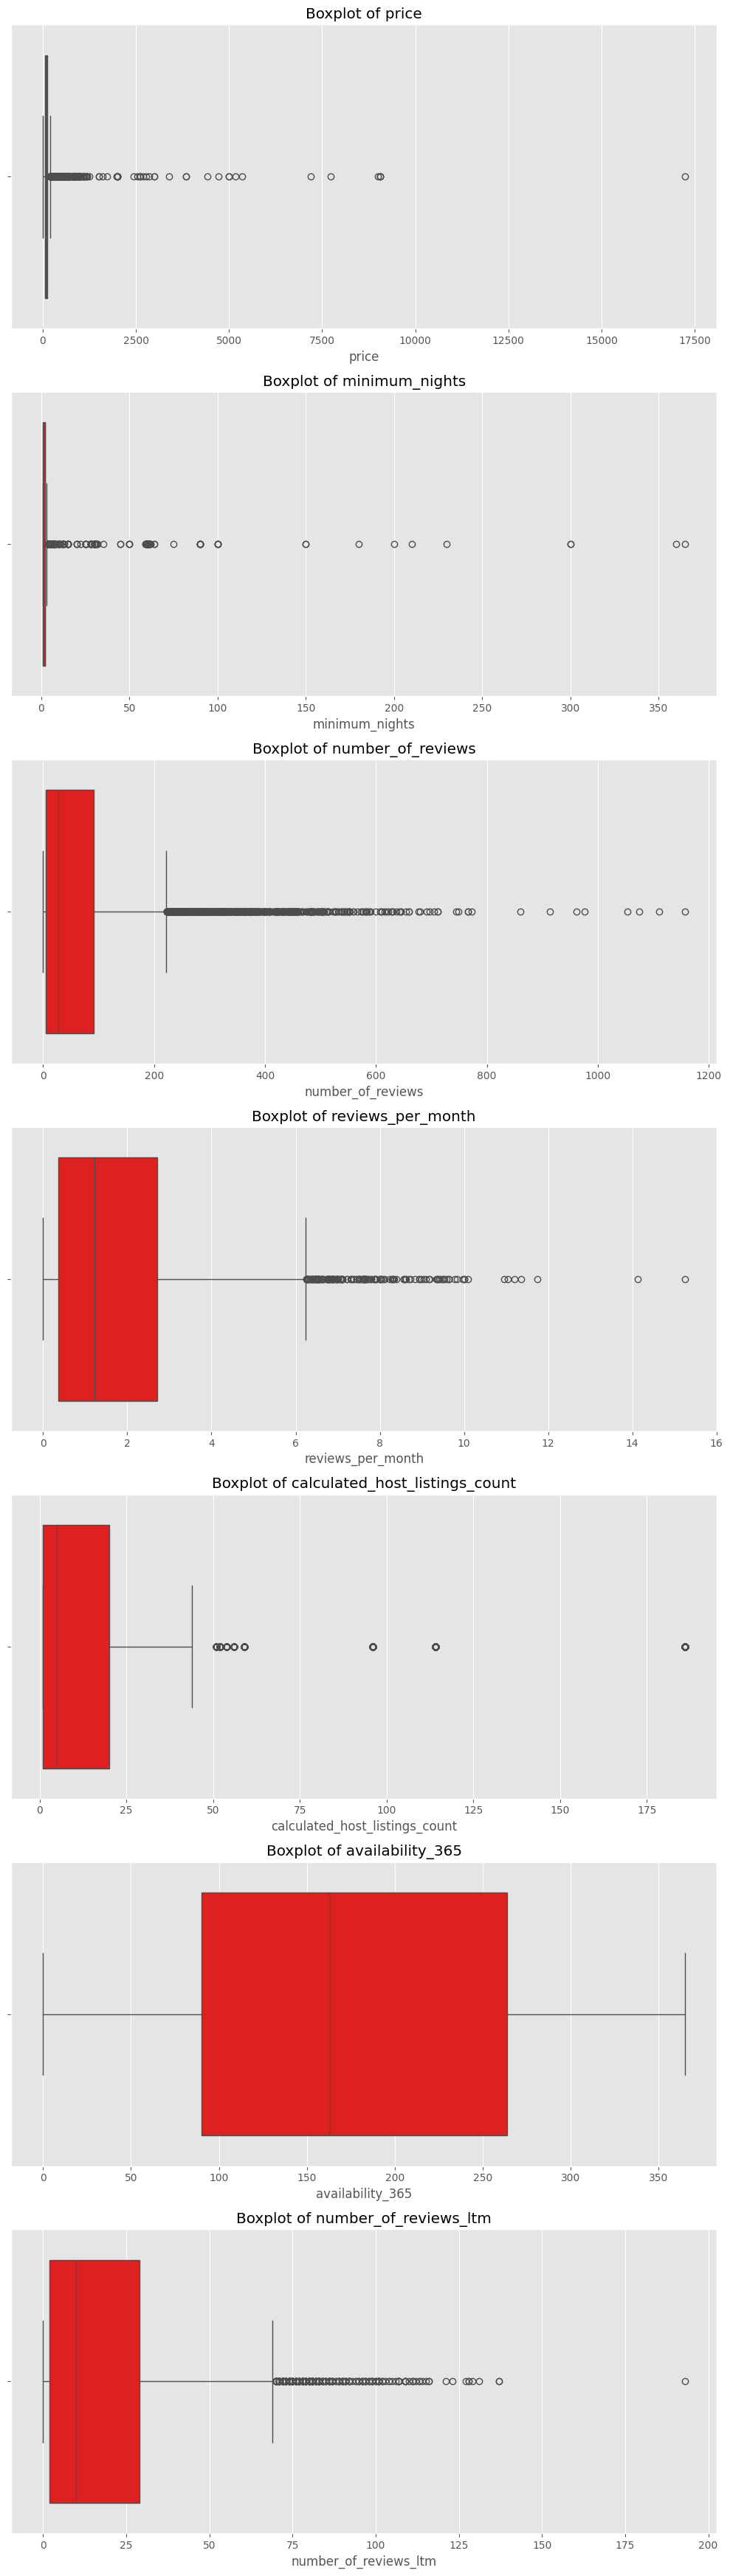

In [38]:
plot_boxplots(df2)

In [39]:
# 'price'

# Calculating Q1 and Q3:
Q1 = df2['price'].quantile(0.25)
Q3 = df2['price'].quantile(0.75)

# Computing IQR and determining outlier boundaries:
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers:
outliers = df2[(df2['price'] < lower_bound) | (df2['price'] > upper_bound)]

# Printing results:
print(f'Q1: {Q1}')
print(f'Q3: {Q3}')
print(f'IQR: {IQR}')
print(f'Lower Bound: {lower_bound}')
print(f'Upper Bound: {upper_bound}')
print(f'N.º entries above Upper Bound: {(len(df2[df2.price > upper_bound]))}')
print(f'Percentage of dataset: {round((len(df2[df2.price > upper_bound]) / df2.shape[0]) * 100, 2)}%')

Q1: 63.0
Q3: 119.0
IQR: 56.0
Lower Bound: -21.0
Upper Bound: 203.0
N.º entries above Upper Bound: 692
Percentage of dataset: 8.78%


In [40]:
# 'minimum_nights'

# Calculating Q1 and Q3:
Q1 = df['minimum_nights'].quantile(0.25)
Q3 = df['minimum_nights'].quantile(0.75)

# Computing IQR and determining outlier boundaries:
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers:
outliers = df[(df['minimum_nights'] < lower_bound) | (df['minimum_nights'] > upper_bound)]

# Printing results:
print(f'Q1: {Q1}')
print(f'Q3: {Q3}')
print(f'IQR: {IQR}')
print(f'Lower Bound: {lower_bound}')
print(f'Upper Bound: {upper_bound}')
print(f'N.º entries above Upper Bound: {(len(df2[df2.minimum_nights > upper_bound]))}')
print(f'Percentage of dataset: {round((len(df2[df2.minimum_nights > upper_bound]) / df2.shape[0]) * 100, 2)}%')

Q1: 1.0
Q3: 2.0
IQR: 1.0
Lower Bound: -0.5
Upper Bound: 3.5
N.º entries above Upper Bound: 448
Percentage of dataset: 5.68%


Given these considerations, we will create a new DataFrame named 'df_clean' to store a cleaned version of the dataset. We will remove all entries where the price is equal to 0.0 and higher than 119.0.

Similarly, we will exclude entries where the 'minimum_nights' value exceeds 3.

In [41]:
df_clean = df2.copy()

In [42]:
# Selecting the entries that meet the specified criteria:
df_clean = df_clean[(df2['price'] <= 119.0) & (df2['minimum_nights'] <= 3)]

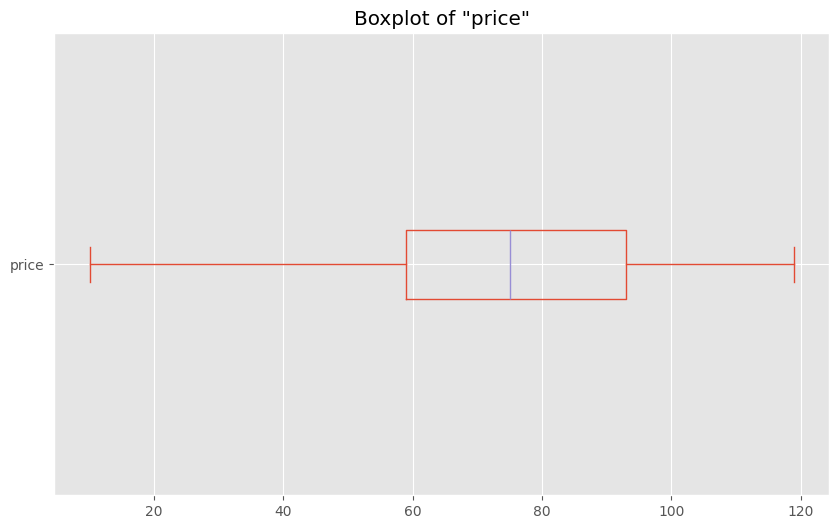

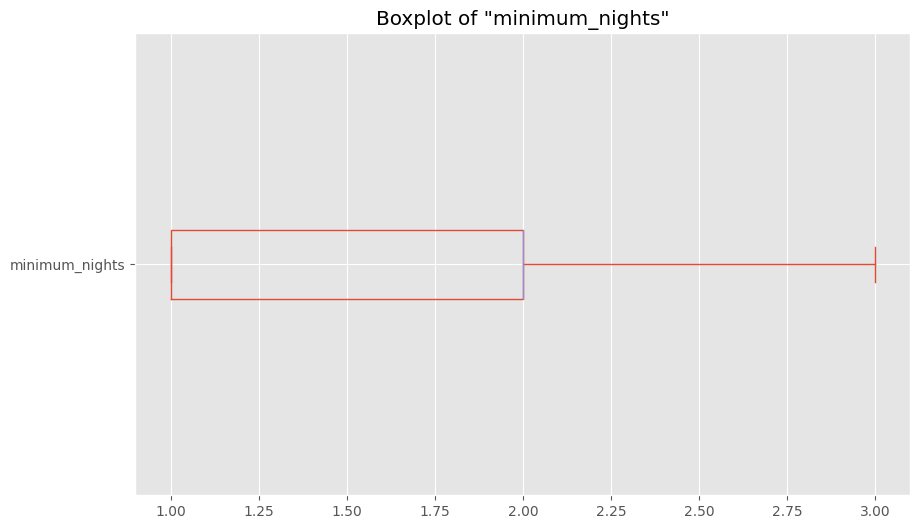

In [43]:
# Plotting the boxplots after removing outliers:
fig, ax = plt.subplots(figsize=(10,6))
df_clean['price'].plot(kind='box', vert=False)
ax.set_title('Boxplot of "price"')
plt.show()

fig, ax = plt.subplots(figsize=(10,6))
df_clean['minimum_nights'].plot(kind='box', vert=False)
ax.set_title('Boxplot of "minimum_nights"')
plt.show()

array([[<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'minimum_nights'}>,
        <Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'last_review'}>],
       [<Axes: title={'center': 'reviews_per_month'}>,
        <Axes: title={'center': 'calculated_host_listings_count'}>,
        <Axes: title={'center': 'availability_365'}>],
       [<Axes: title={'center': 'number_of_reviews_ltm'}>, <Axes: >,
        <Axes: >]], dtype=object)

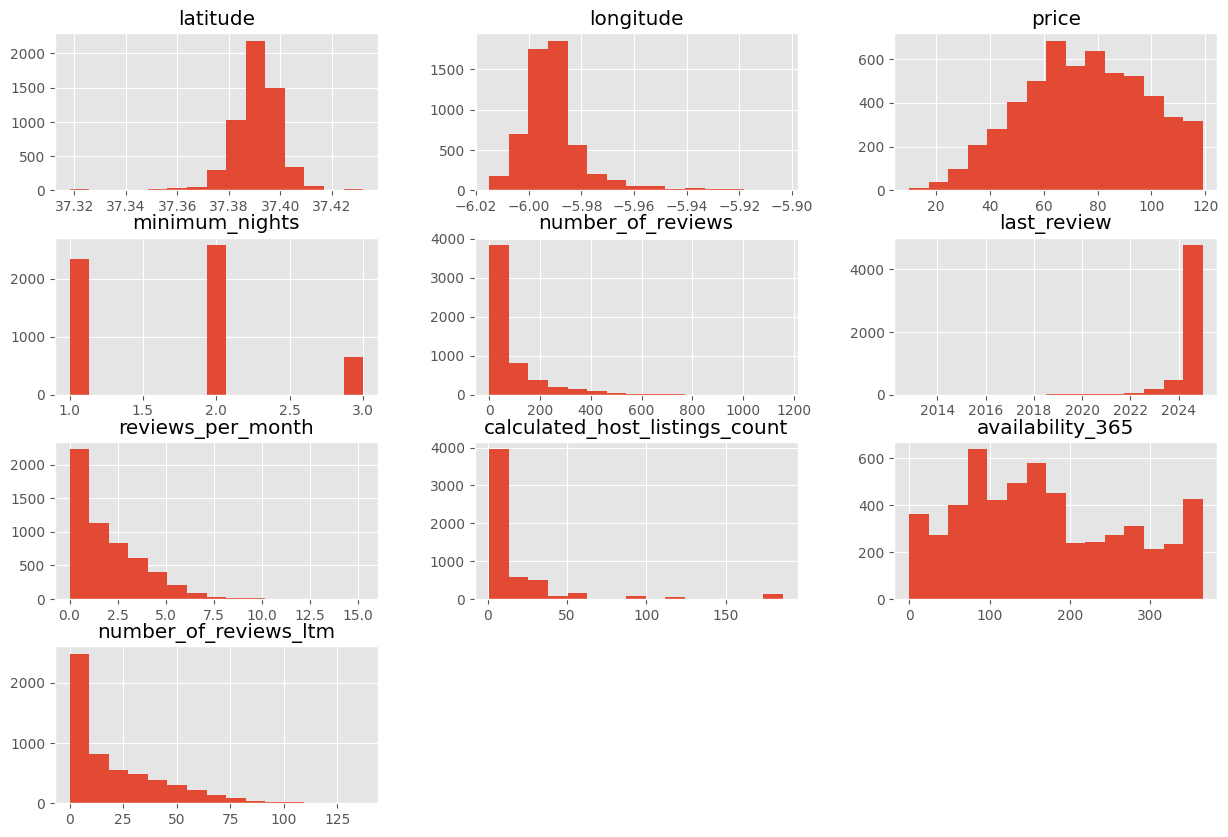

In [44]:
# Plotting cleaned histograms:
df_clean.hist(bins=15, figsize=(15,10))

After cleaning the dataset, the distributions now appear to be satisfactory.

#### 3.4. Correlations

Next, we will investigate potential correlations between the variables in the dataset.

We will start by generating a correlation matrix using the corr() method and then visualize this matrix using the 'heatmap' function from Seaborn.

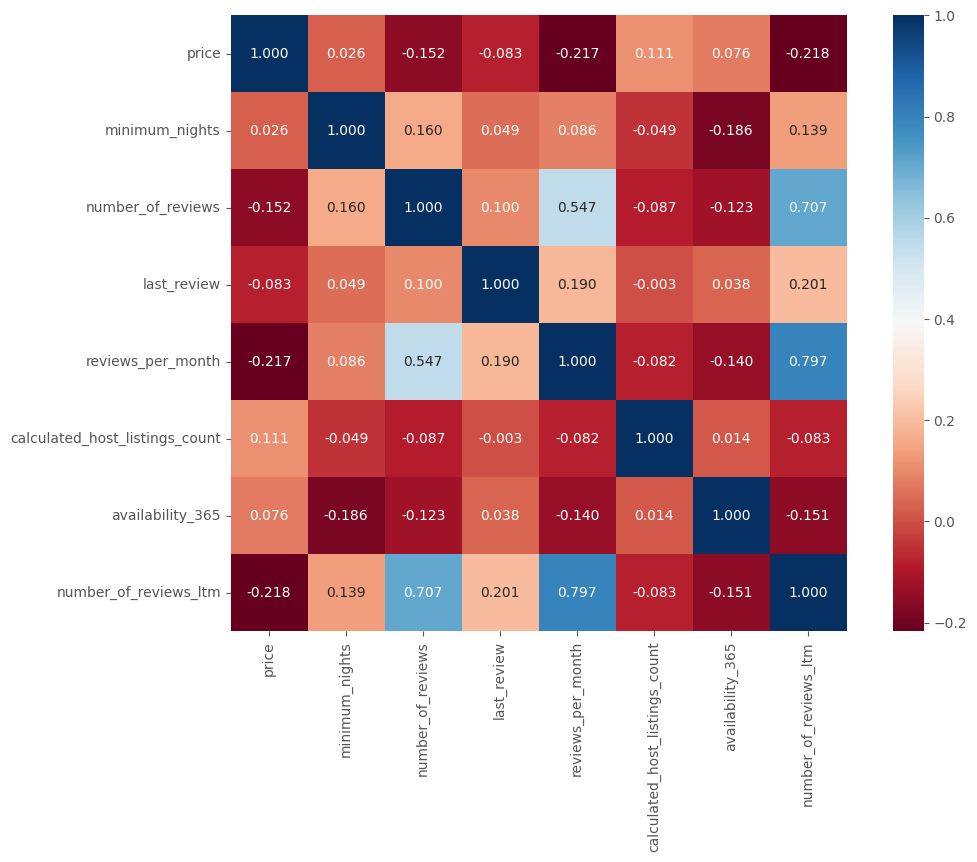

In [45]:
correlation_matrix = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month',
                        'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix,
            cmap='RdBu',
            fmt='.3f',
            square=True,
            linecolor='white',
            annot=True)

plt.show()

As observed in the chart, there appear to be no significant correlations.

## 4. Feature Engineering

Next, we will create features that are expected to have an impact on the analysis.

- Extracting datetime variables.
- **Total Listings**: Number of active listings in a specified area.
- **Occupancy Rate**: Percentage of days that properties are rented versus days that are available.
- **Average Daily Rate (ADR)**: Average price per night among all available listings.
- **Revenue Estimates**: Projected earnings for hosts determined by occupancy rate and daily price.
- **Market Share**: Proportion of total listings revenues captured by Airbnb compared to hotels.

In [48]:
# Extracting year, month and day for each date variable:
df_clean['last_review_year'] = df_clean['last_review'].dt.year
df_clean['last_review_month'] = df_clean['last_review'].dt.month
df_clean['last_review_day'] =df_clean['last_review'].dt.day

# Listing of newly created date feature variables:
date_features = ['last_review_year', 'last_review_month', 'last_review_day']

In [49]:
df_clean.head(2)

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,last_review_year,last_review_month,last_review_day
0,32347,SevillaCenter,139939,Casco Antiguo,San Vicente,37.39358,-5.99975,Entire home/apt,99.0,2,167,2020-01-08,1.02,1,2,0,CTC-2018150852,2020,1,8
1,49287,BEAUTIFUL APARTMENT IN SEVILLE,224697,Casco Antiguo,San Lorenzo,37.39898,-5.99533,Entire home/apt,80.0,3,39,2020-02-17,0.24,1,161,0,VFT/SE/01116,2020,2,17


In [50]:
# Generating Total Listings:
total_listings = df_clean['id'].nunique()
print(f"Total Listings: {total_listings}")

Total Listings: 5570


In [51]:
# Generating Occupancy Rate variable:
df_clean['occupancy_rate'] = round((365 - df_clean['availability_365']) / 365 * 100,2)
df_clean['occupancy_rate']

avg_occupancy_rate = df_clean['occupancy_rate'].median()
print(f'Average Occupancy Rate: {avg_occupancy_rate}')

Average Occupancy Rate: 57.81


In [52]:
# Calculating the Average Daily Rate:
avg_daily_rate = df_clean['price'].median().round(2)
print(f'Average Daily Rate: {avg_daily_rate}€')

Average Daily Rate: 75.0€


In [53]:
# Estimating Revenue Estimates:
df_clean['estimated_revenue'] = df_clean['price'] * (365 - df_clean['availability_365'])
total_estimated_revenue = df_clean['estimated_revenue'].sum().round(2)
print(f'Total Estimated Revenue: {total_estimated_revenue}€')

Total Estimated Revenue: 81513518.0€


In [54]:
# Calculating Market Share:
total_rental_properties_seville = 14500 # Approximately the amount of rental accommodations in Seville in 2024 (legal and illegal)
market_share = round((total_listings / total_rental_properties_seville) * 100,2)
print(f'Market Share: {market_share}%')

Market Share: 38.41%


## 5. Data Analysis

We will analyze the final dataset focusing in two key areas. On the one hand, we will perform a descriptive analysis, which will allow us to summarize and understand the basic characteristics of the data. On the other, we will explore graph analysis, where we will examine different types of graphs: univariate, bivariate, and multivariate. This approach will help us visualize relationships and trends in the data more clearly.

1. Descriptive Analysis
2. Graph Analysis
    - 2.1. Univariate Analysis
    - 2.2. Bivariate Analysis
    - 2.3. Multivariate Analysis

In [55]:
df3 = df_clean.copy()

In [56]:
df3.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 5570 entries, 0 to 7884
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              5570 non-null   object        
 1   name                            5570 non-null   object        
 2   host_id                         5570 non-null   object        
 3   neighbourhood_group             5570 non-null   object        
 4   neighbourhood                   5570 non-null   object        
 5   latitude                        5570 non-null   float64       
 6   longitude                       5570 non-null   float64       
 7   room_type                       5570 non-null   object        
 8   price                           5570 non-null   float64       
 9   minimum_nights                  5570 non-null   int64         
 10  number_of_reviews               5570 non-null   int64         
 11  last_revi

### **5.1. Descriptive Analysis**

In [57]:
df3.describe(include='object').T

,count,unique,top,freq
id,5570,5570,32347,1
name,5570,5424,Apartamento en el centro de Sevilla,6
host_id,5570,2340,14958822,142
neighbourhood_group,5570,11,Casco Antiguo,3682
neighbourhood,5570,104,Alfalfa,573
room_type,5570,4,Entire home/apt,4538
license,5570,3987,Exempt,345


**Conclusions**
- **'id'**: Each listing has a unique ID, with a total of 5,570 unique IDs. There are no duplicate entries.
- **'name'**: The most frequent name is 'Apartamento en el centro de Sevilla', which appears up to 6 times. It may be a popular name/headline to attract guests.
- **'host_id'**: Each host has a unique ID, with a total of 2,340 unique values. There are some duplicates, such as 14958822 with a total of 142 entries. This indicates that the host manages multiple properties.
- **'neighborhood_group'**: The most frequent neighborhood group is *Casco Antiguo*, with 3,682 listings. This suggests it is a popular area in the city among guests.
- **'neighborhood'**: Within *Casco Antiguo*, the neighborhood of *Alfalfa* seems to have the highest frequency of listings, with a total of 573 listings.
- **'room_type'**: The preferred room type is 'Entire home/apartment', with 4,538 entries. This suggests that either the majority of accommodations are of this type, or over time, the market has increasingly focused on this type due to its high demand among tourists. This trend may reflect a preference for greater privacy and comfort, making them appealing to tourists.
- **'license'**: A notable portion of listings (345 listings) has 'Exempt' licence type, which suggests that they might not require traditional licensing, which could have implications for regulation and compliance.

In [58]:
df3.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
latitude,5570.0,37.390773,0.009669,37.318174,37.386333,37.390645,37.396570,37.432052
longitude,5570.0,-5.990366,0.012723,-6.014914,-5.997450,-5.992100,-5.986402,-5.903543
price,5570.0,75.024865,22.804850,10.000000,59.000000,75.000000,93.000000,119.000000
minimum_nights,5570.0,1.696948,0.667116,1.000000,1.000000,2.000000,2.000000,3.000000
number_of_reviews,5570.0,80.785458,119.784986,0.000000,7.000000,33.000000,102.000000,1157.000000
reviews_per_month,5570.0,1.983108,1.842353,0.000000,0.490000,1.475000,3.027500,15.250000
calculated_host_listings_count,5570.0,17.193716,33.831079,1.000000,1.000000,5.000000,17.000000,186.000000
availability_365,5570.0,167.585278,102.085001,0.000000,88.000000,154.000000,250.000000,365.000000
number_of_reviews_ltm,5570.0,20.797307,22.855068,0.000000,2.000000,12.000000,33.000000,137.000000
last_review_year,5570.0,2023.882047,0.784513,2012.000000,2024.000000,2024.000000,2024.000000,2025.000000


**Conclusions**
- **'price'**: The average price per listing is approximately 75.02€, with a minimum price of 10.00€ and a maximum of 119.00€. The relatively low standard deviation (about 22.80€) indicates that most prices are clustered around the mean, although there are some lower-priced options.
- **'minimum_nights'**: The average minimum stay is approximately 1.70 nights, suggesting a trend toward short-term rentals.
- **'number_of_reviews'**: Listings have on average about 80.79 reviews, with some having none and others up to 1,157 reviews. This variation indicates that while some properties are well-reviewed and popular, others may be newer or less frequently rented.
- **'reviews_per_month'**: The average of about 1.98 reviews per month further emphasizes this, showing a consistent and modest flow of guest feedback.
- **'calculated_host_listings_count'**: The average host manages about 17.19 listings, with a maximum of 186 listings. This suggests that there is a mix of both individual hosts and larger property management companies operating in the area.
- **'availability_365'**: The average availability across the year is about 167.59 days, indicating that many properties are available for a significant portion of the year but not necessarily booked all the time.
- **'occupancy_rate'**: The average occupancy rate is 54.09%, with a range from 0% to 100%. This suggests that some properties are highly demanded, while others may struggle to attract guests.
- **'estimated_revenue'**: The average estimated revenue is approximately 14,634.38€, with a wide range from 0€ to 43,078€. This indicates that many hosts earn a substantial income, there are also hosts that may not generate significant revenue, possibly due to low occupancy or pricing.

In [59]:
df3.describe(include='datetime').T

,count,mean,min,25%,50%,75%,max
last_review,5570,2024-04-15 03:57:35.224416256,2012-10-29 00:00:00,2024-05-11 00:00:00,2024-06-10 00:00:00,2024-06-23 00:00:00,2025-01-01 00:00:00


**Conclusions**
- **'last_review'**: The earliest recorded review date is October 29th, 2012, while the most frequent review date is June 23rd, 2024, with a total of 494 reviews. The latest review date is June 29th as noted at the beginning of the notebook, during the general analysis. Additionally, there are some missing values, which have been temporarily replaced with a future date of January 1st, 2025, for analytical consistency.

### **5.2. Graph Analysis**

#### **5.2.1. Univariate Analysis**

In [60]:
# Defining the variables we want to convert into groups:
categorical_variables = ['id', 'name', 'host_id', 'neighbourhood_group', 'neighbourhood',
                         'room_type', 'license']
numeric_variables = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
                     'reviews_per_month', 'calculated_host_listings_count', 'availability_365',
                     'number_of_reviews_ltm', 'occupancy_rate', 'estimated_revenue', 'last_review_year',
                     'last_review_month', 'last_review_day']
datetime_variables = ['last_review']

##### - Categorical variables

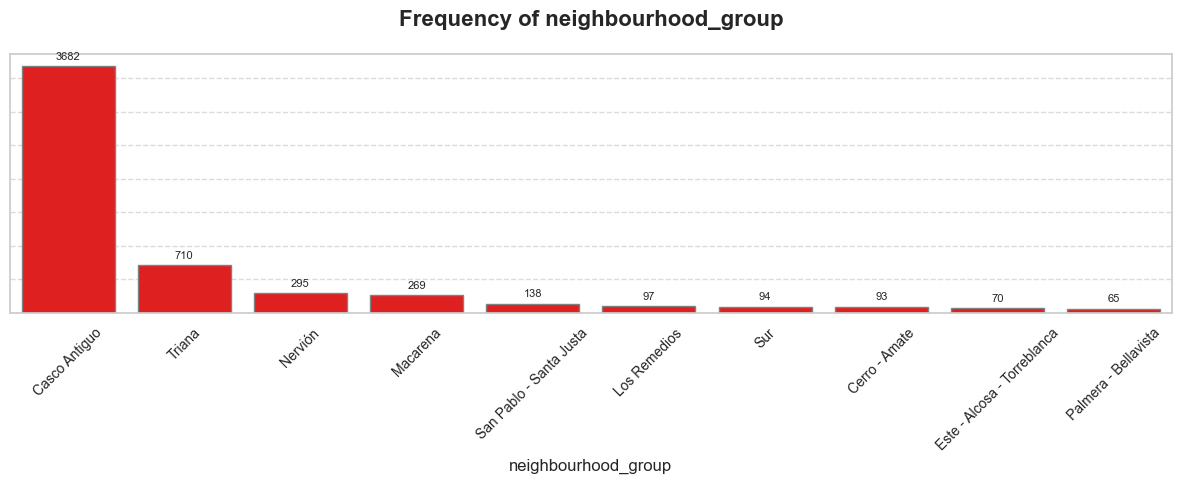

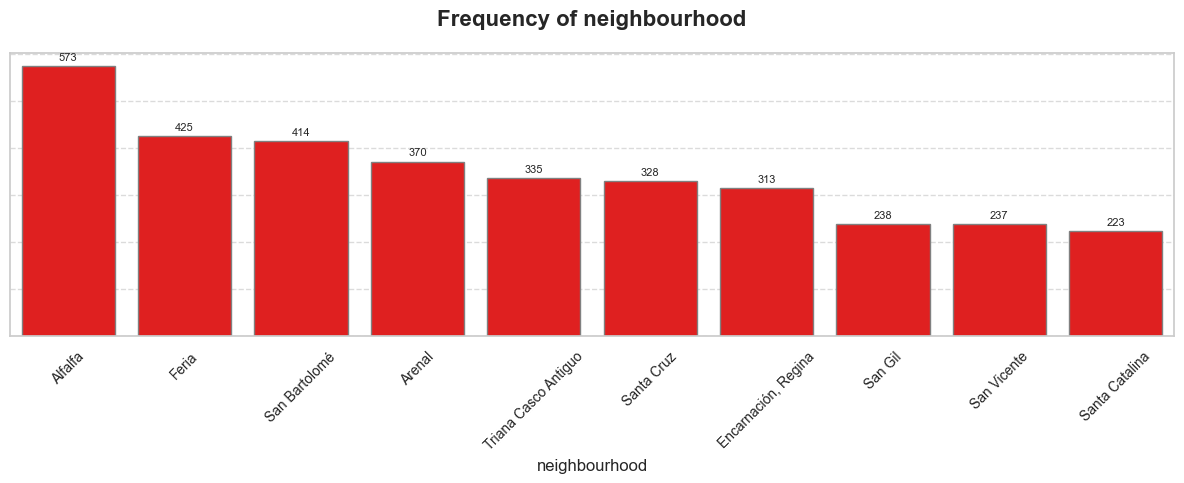

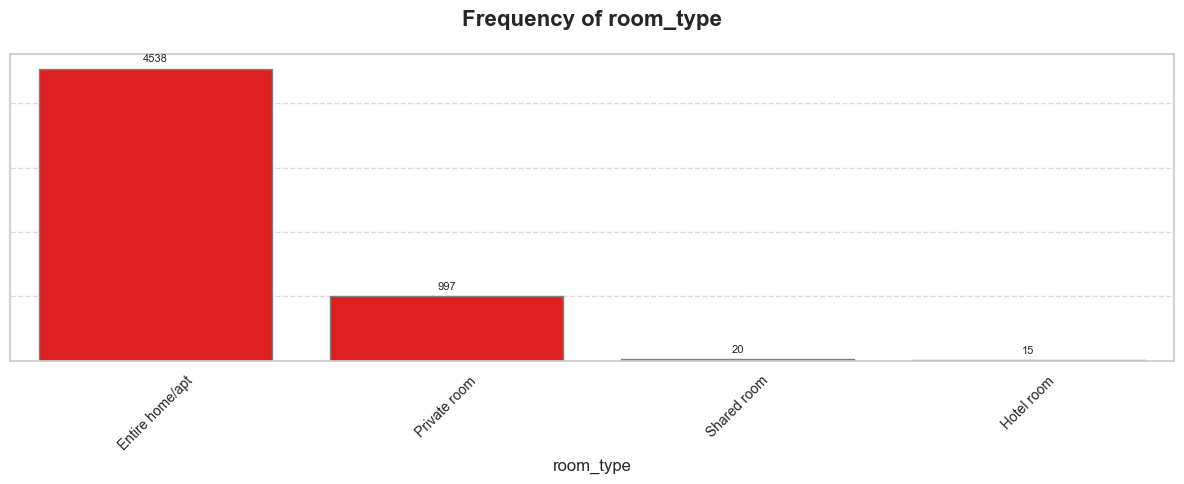

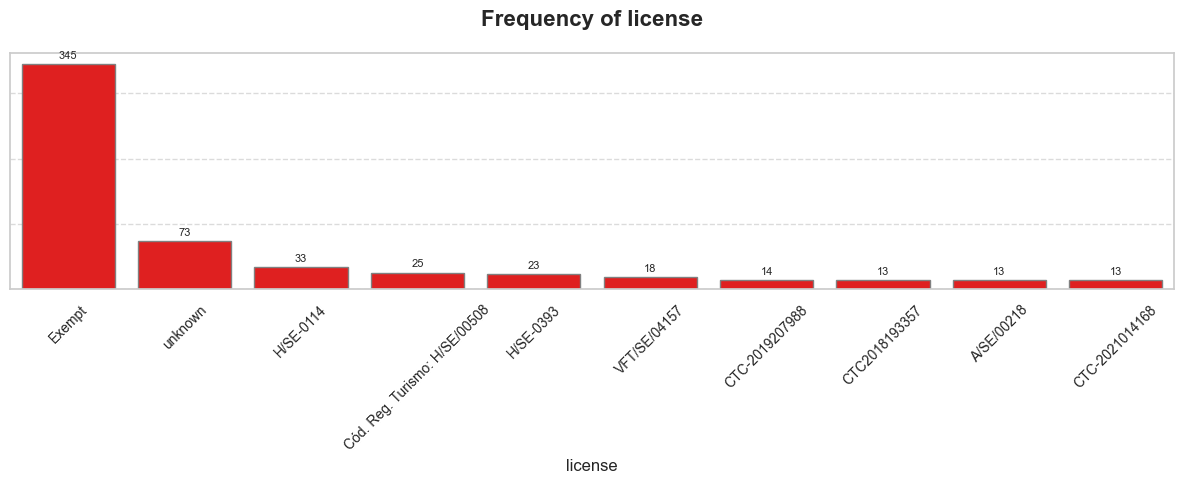

In [61]:
# Identifying categorical variables:
excluded_variables = ['id', 'name', 'host_id']
categorical_variables = df3.select_dtypes(include=['object']).columns
categorical_variables = [col for col in categorical_variables if col not in excluded_variables]

# Setting the style:
sns.set(style='whitegrid')

for col in categorical_variables:
    plt.figure(figsize=(12, 5))

    # Getting the unique listing counts for each category in the categorical variable:
    listing_counts = df3.groupby(col)['id'].nunique()

    # Sorting listing counts:
    listing_counts = listing_counts.sort_values(ascending=False) #!!

    # Checking if there are more than 10 categories:
    if len(listing_counts) > 10:
        # Selecting the top 10 categories when needed:
        top_categories = listing_counts.nlargest(10)
    else:
        # Using all categories:
        top_categories = listing_counts

    # Creating the bar plot with a grey edge and the brand color:
    ax = sns.barplot(x=top_categories.index, y=top_categories.values, color='red', edgecolor='grey')

    # Setting title and labels fontsize:
    ax.set_title(f'Frequency of {col}', fontsize=16, fontweight='bold', pad=20)

    # Setting ticks and labels to avoid the warning:
    ax.set_xticks(range(len(top_categories)))                           # Set x-ticks
    ax.set_xticklabels(top_categories.index, rotation=45, fontsize=10)  # Set x-tick labels

    # Removing the y-axis labels:
    ax.set_yticklabels([])
    ax.set_ylabel('')

    # Adding count labels on top of the bars with a smaller font size:
    for p in ax.patches:
        height = int(p.get_height())
        if height > 0:
            ax.annotate(f'{height}',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', xytext=(0, 3),
                        textcoords='offset points', fontsize=8)

    # Adding grid lines for easier reading:
    ax.yaxis.grid(True, linestyle='--', alpha=0.7)

    # Adjusting layout to prevent overlap:
    plt.tight_layout()
    plt.show()

**Conclusions**
- *Casco Antiguo* is the most represented neighborhood group, with 3,682 listings. This is followed by *Triana* with 710 listings and *Nervión* with 295 listings.
- At a more granular level, *Alfalfa* emerges as the most represented neighborhood with 573 listings, followed by *Feria* with 425 listings and *San Bartolomé* with 414 listings.
- The distribution of room types is notably uneven. Entire homes/apartments make up the majority with 4,538 listings, followed by private rooms with 997 listings. Shared rooms and hotel rooms account for 20 and 15 listings, respectively.
- In terms of license types, exempt licenses are the most prevalent, representing 345 listings, followed by listings with unknown licenses (73) and H/SE-0114 licenses (33).

##### - Numeric variables

We will use histograms for visualizing the distribution of each numeric variable.

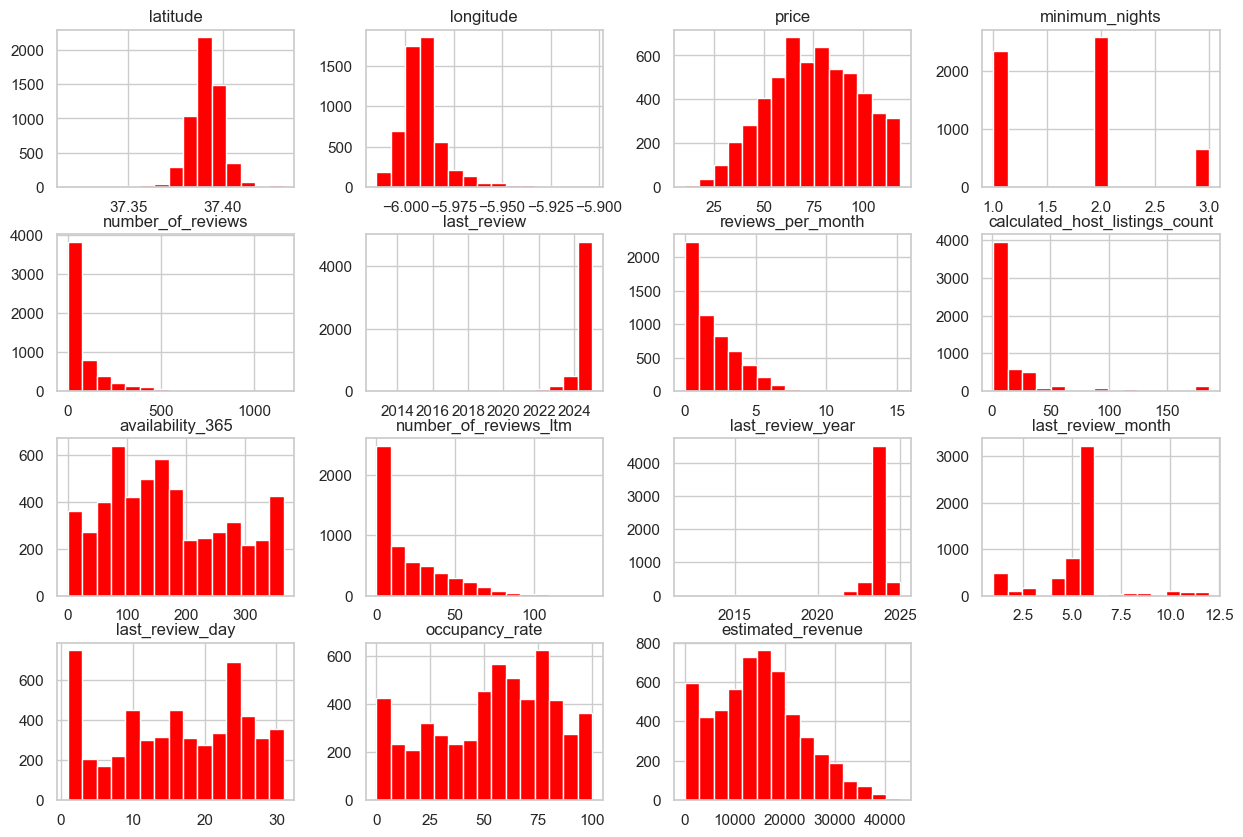

In [62]:
df3.hist(bins=15, figsize=(15,10), color='red')

plt.show()

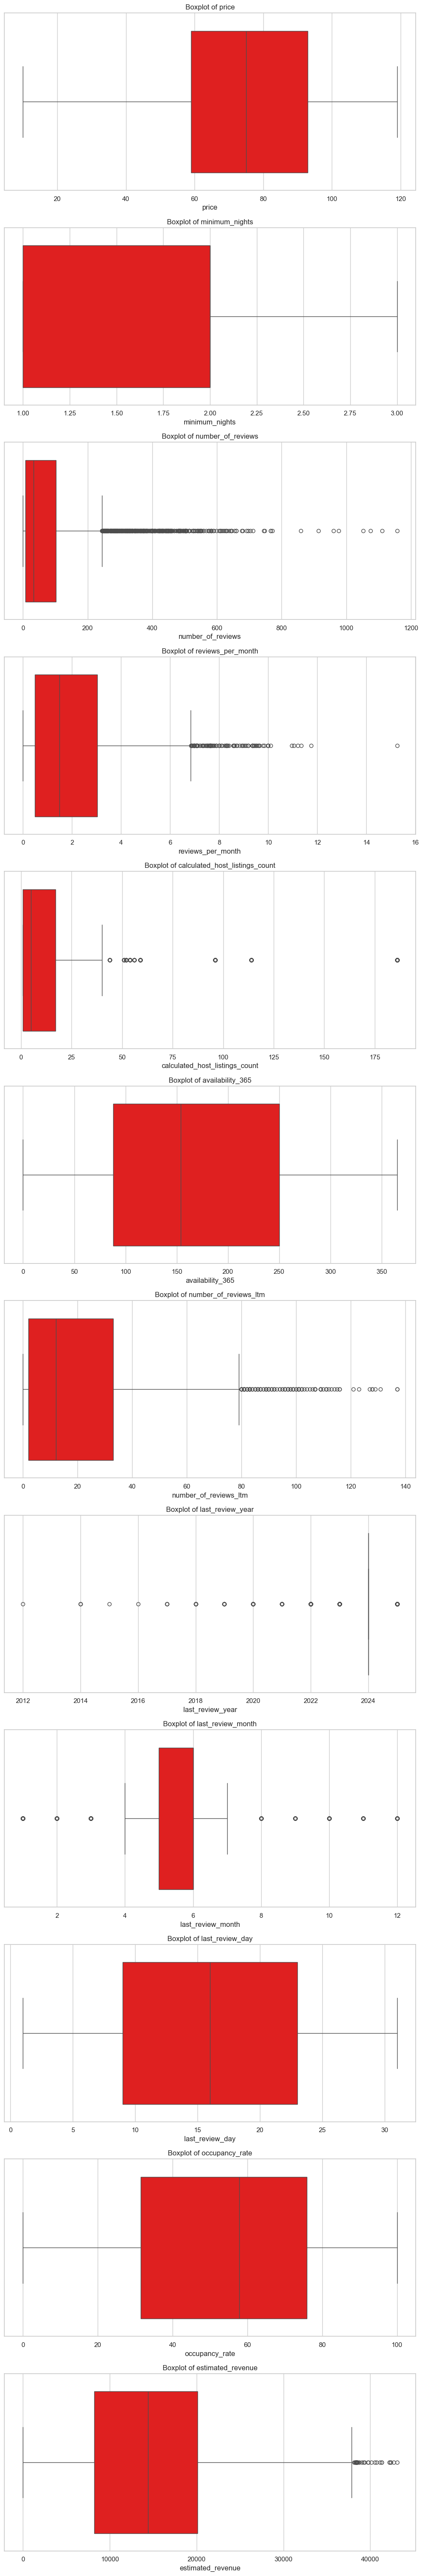

In [63]:
plot_boxplots(df3)

##### - Datetime variables

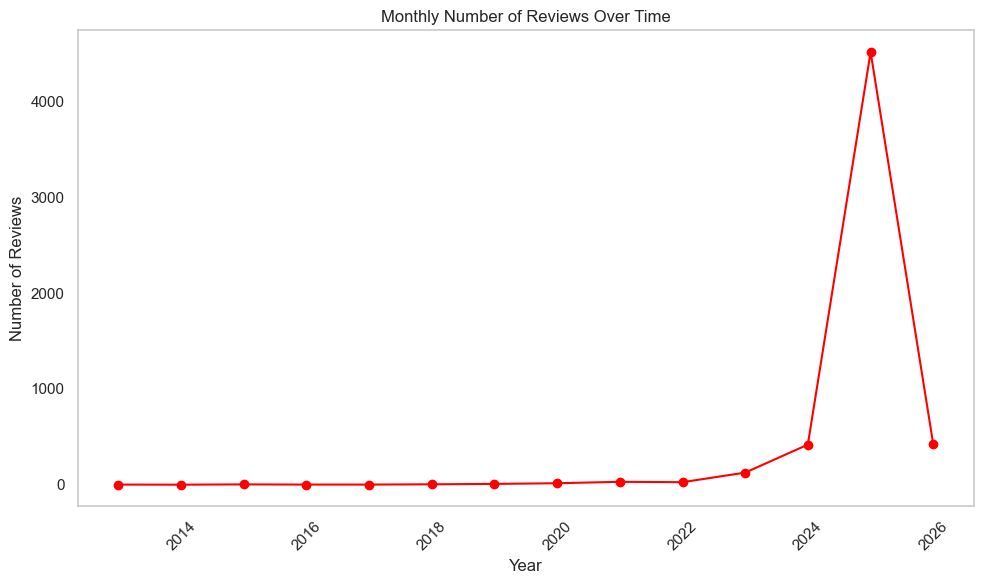

In [64]:
# Aggregating data by year:
yearly_reviews = df3.resample('YE', on='last_review').size()

# Plotting the Time Series Line Graph:
plt.figure(figsize=(10, 6))
plt.plot(yearly_reviews.index, yearly_reviews.values, marker='o', color='red')

plt.title('Monthly Number of Reviews Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)

plt.grid()
plt.tight_layout()
plt.show()

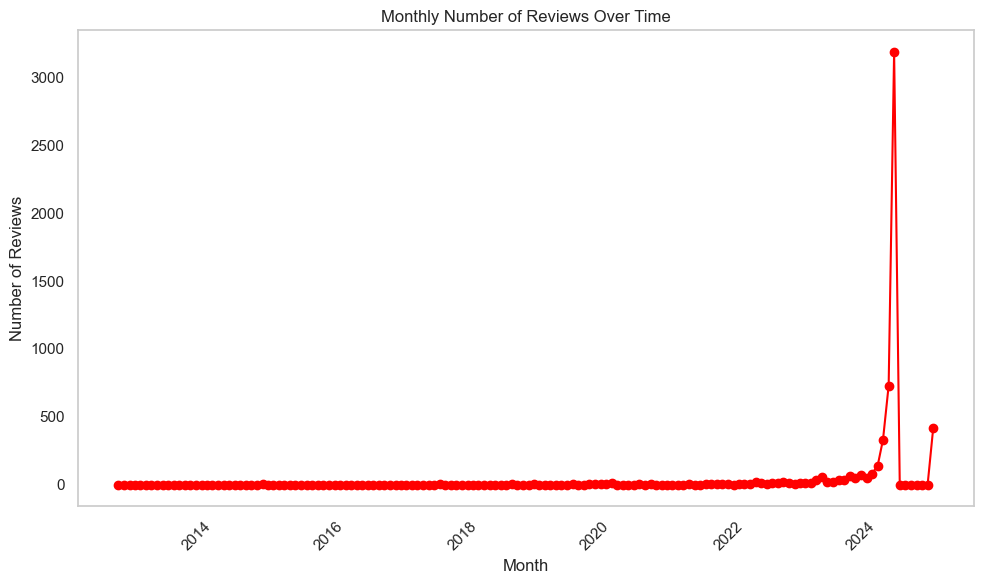

In [65]:
# Aggregating data by month:
monthly_reviews = df3.resample('ME', on='last_review').size()

# Plotting the Time Series Line Graph:
plt.figure(figsize=(10, 6))
plt.plot(monthly_reviews.index, monthly_reviews.values, marker='o', color='red')

plt.title('Monthly Number of Reviews Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)

plt.grid()
plt.tight_layout()
plt.show()

**Conclusions**\
These two graphs confirm the data contains bookings from January 1st to June 30th, 2024, although reviews from listings could vary.\
Additionally, there are some missing values, which have been temporarily replaced with a future date of January 1st, 2025, for analytical consistency.

#### **5.2.2. Bivariate Analysis**

##### - Most listed property types

In [66]:
df_clean['room_type'].value_counts()

room_type
Entire home/apt    4538
Private room        997
Shared room          20
Hotel room           15
Name: count, dtype: int64

In [67]:
roomtype_pct = round(df_clean['room_type'].value_counts() / df_clean.shape[0] * 100, 2)
roomtype_pct

room_type
Entire home/apt    81.47
Private room       17.90
Shared room         0.36
Hotel room          0.27
Name: count, dtype: float64

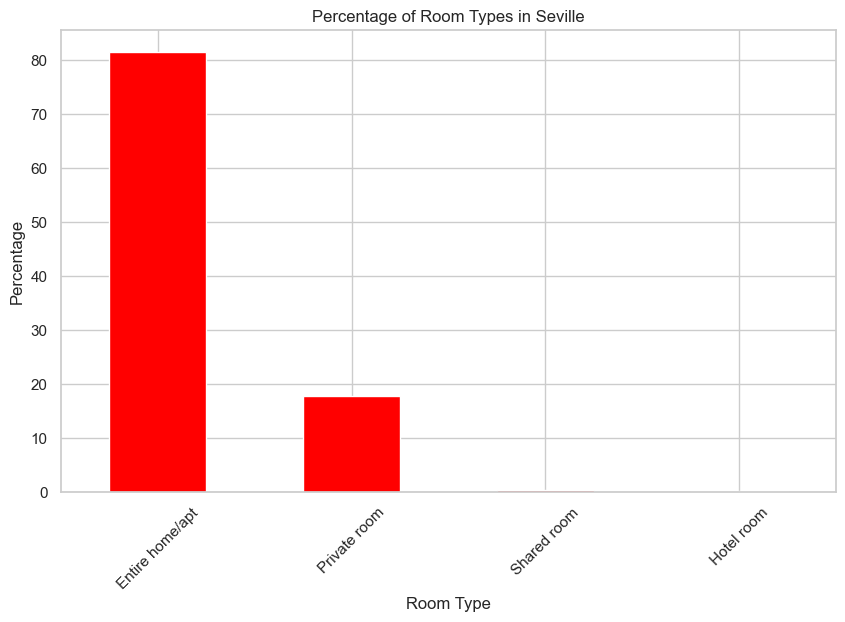

In [68]:
# Plotting the percentage of each property type listing in Seville:
roomtype_pct.plot(kind='bar', figsize=(10, 6), color='red')

plt.xlabel('Room Type')
plt.ylabel('Percentage')

plt.title('Percentage of Room Types in Seville')
plt.xticks(rotation=45)

plt.show()

**Conclusions**\
As observed in the graph, entire properties and private rooms constitute the majority of listed accommodations in Seville (81.47% and 17.90% respectively).

##### - Top 10 most expensive neighbourhoods listing prices on average

In [69]:
mostexpensive_neighbourhood = df_clean.groupby('neighbourhood')['price'].mean().round(2).sort_values(ascending=False)[:10]
mostexpensive_neighbourhood

neighbourhood
Tabladilla, La Estrella    113.00
El Cano, Los Bermejales     87.00
Santa Cruz                  86.86
Zodiaco                     85.00
Pino Flores                 85.00
Arenal                      84.50
San Bernardo                84.30
Alfalfa                     82.34
Museo                       81.37
Retiro Obrero               80.75
Name: price, dtype: float64

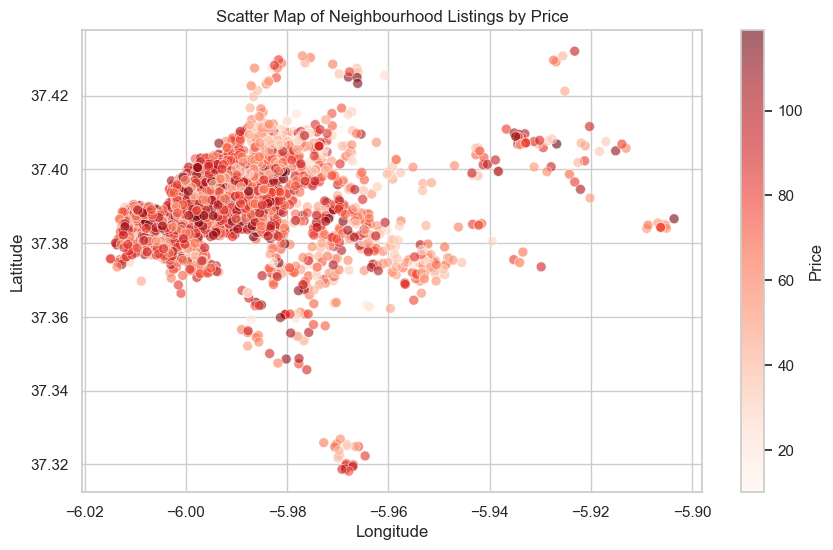

In [70]:
# Plotting the neighbourhood listing price of properties in Seville:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_clean['longitude'],
                      df_clean['latitude'], 
                      c=df_clean['price'], 
                      cmap='Reds', 
                      s=50,             # Sets the size of the points
                      alpha=0.6,
                      edgecolors='w', 
                      linewidth=0.5)

plt.colorbar(scatter, label='Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Map of Neighbourhood Listings by Price')
plt.grid(True)
plt.show()

**Conclusions**\
The variation in average prices among the ten most expensive neighbourhoods in Seville is minimal, as indicated by the results. This suggests that, despite some differences, the average prices across these neighbourhoods are relatively consistent. Seville, known for its rich cultural heritage and diverse districts, displays subtle price differences in its most affluent areas, reflecting a generally uniform high-value market segment.

##### - Average listing price by property type

In [71]:
# Calculating the average price by 'room_type':
avgprice_roomtype = df_clean.groupby('room_type')['price'].mean().round(2).sort_values(ascending=False)
avgprice_roomtype

room_type
Hotel room         99.07
Entire home/apt    79.97
Private room       52.73
Shared room        45.25
Name: price, dtype: float64

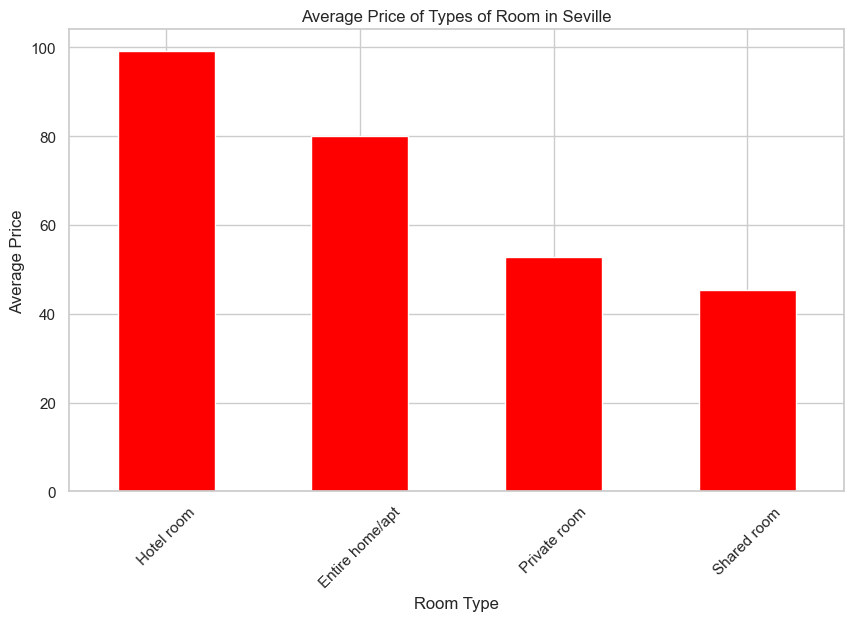

In [72]:
# Plotting the average price of each type of room in Seville:
avgprice_roomtype.plot(kind='bar', figsize=(10, 6), color='red')

plt.xlabel('Room Type')
plt.ylabel('Average Price')

plt.title('Average Price of Types of Room in Seville')
plt.xticks(rotation=45)

plt.show()

**Conclusions**\
As observed in the graph, hotel rooms and entire properties have the highest prices in Seville.

##### - Price Distribution

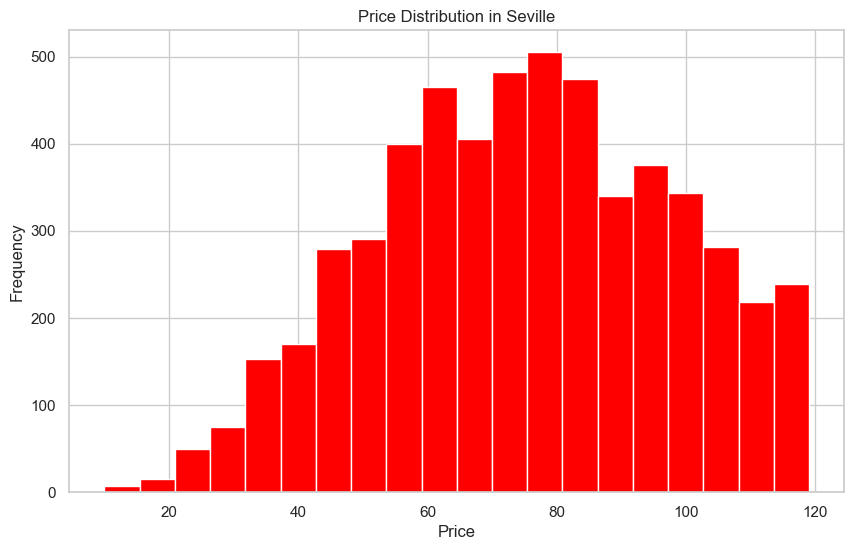

In [73]:
# Plotting the price distribution in Seville:
df3['price'].plot(kind='hist', figsize=(10, 6), bins=20, color='red')

plt.xlabel('Price')
plt.ylabel('Frequency')

plt.title('Price Distribution in Seville')

plt.show()

**Conclusions**\
The histogram shows a right-skewed distribution, with the majority of listings concentrated between 40€ and 90€ per night. The most common price range appears to be between 60€ and 80€, where the frequency peaks at around 500 listings. Prices below 30€ and above 100€ are less frequent, suggesting that budget and expensive listings are less common compared to mid-range options. The overall pattern suggests a robust offering of moderately priced listings, with fewer listings at the extreme low and high ends of the price spectrum.

##### - Occupancy Trends

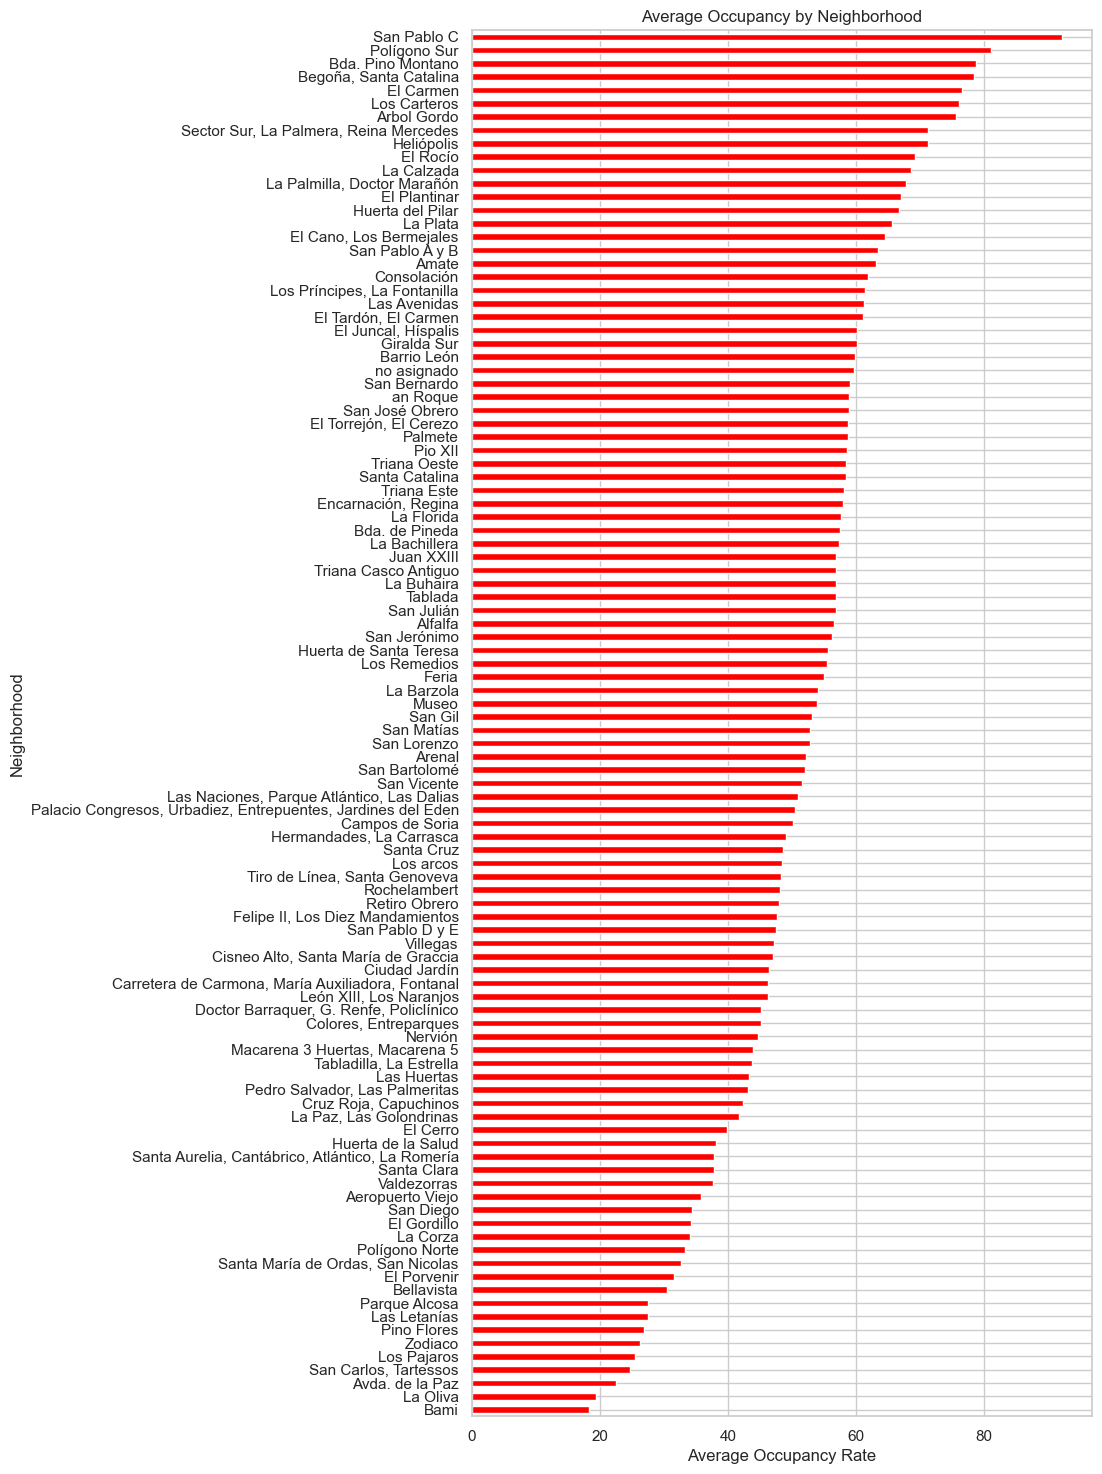

In [74]:
# Grouping by 'neighbourhood' and calculating the average occupancy rate:
avg_occupancy_rate = df3.groupby('neighbourhood')['occupancy_rate'].mean()

# Sorting:
avg_occupancy_rate_sorted = avg_occupancy_rate.sort_values(ascending=True)

avg_occupancy_rate_sorted.plot(kind='barh', figsize=(8, 18), color='red')

plt.xlabel('Average Occupancy Rate')
plt.ylabel('Neighborhood')
plt.title('Average Occupancy by Neighborhood')

plt.show()

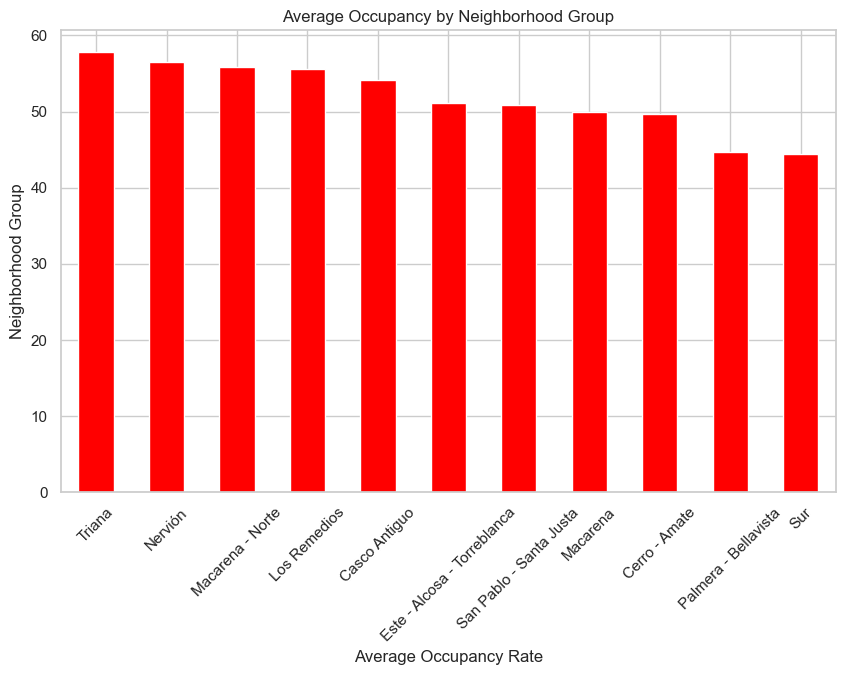

In [75]:
# Grouping by 'neighbourhood_group' and calculating the average occupancy rate:
avg_occupancy_rate = df3.groupby('neighbourhood_group')['occupancy_rate'].mean()

# Sorting:
avg_occupancy_rate_sorted = avg_occupancy_rate.sort_values(ascending=False)

avg_occupancy_rate_sorted.plot(kind='bar', figsize=(10, 6), color='red')

plt.xlabel('Average Occupancy Rate')
plt.ylabel('Neighborhood Group')
plt.title('Average Occupancy by Neighborhood Group')
plt.xticks(rotation=45)

plt.show()

**Conclusions**\
The bar chart illustrates the average occupancy rates by neighbourhood group. Some key observations are:
- The neighborhoods at the top of the chart, such as **San Pedro C**, **Polígono Sur**, **Bda. Pino Montano**, and **Begoña San Catalina**, have the highest occupancy rates, **nearing or exceeding 70%**. This indicates strong demand for listings in these areas.
- Neighborhoods such as **Los Remedios**, **Feria**, **San Lorenzo**, and **San Bartolomé**, where occupancy rates **hover around 35-50%**, experience moderate demand.
- Neighborhoods towards the bottom, including **Avd. La Paz**, **La Oliva**, and **Bami**, show significant lower occupancy rates, **lower than 25%**. These areas may have less demand or higher supply, leading to lower average occupancy.

##### - Average Daily Rate (ADR) Across Neighborhoods

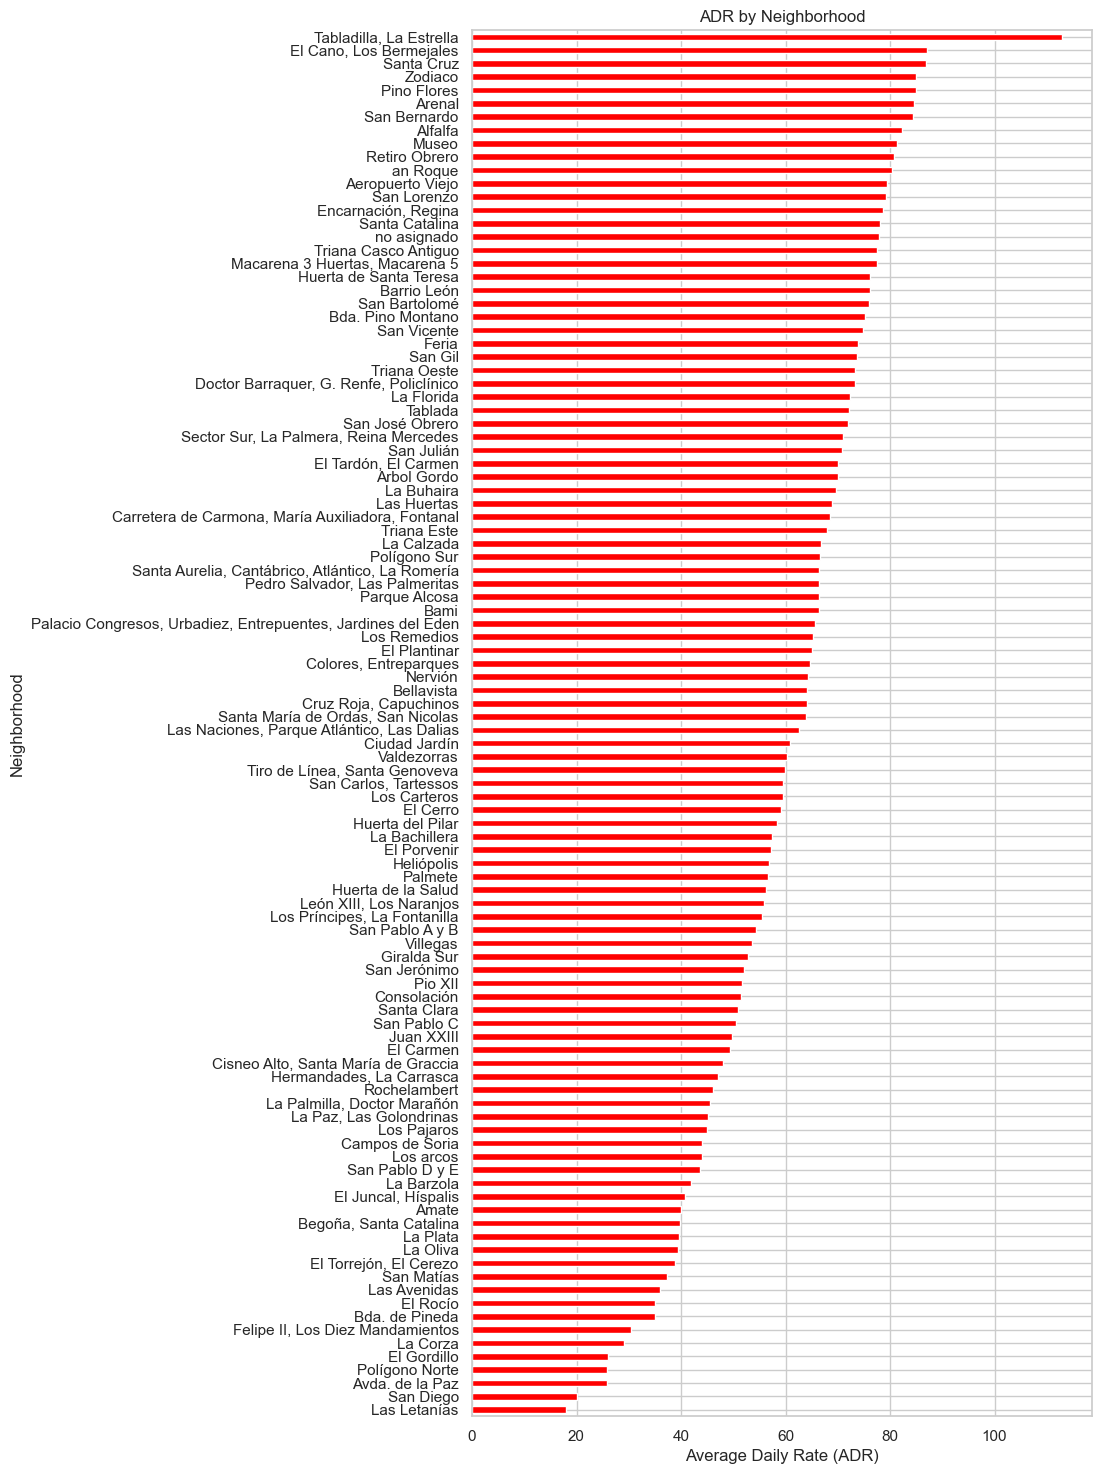

In [76]:
# Grouping by 'neighbourhood' and calculating the average occupancy rate:
avg_daily_rate = df3.groupby('neighbourhood')['price'].mean()

# Sorting:
avg_daily_rate_sorted = avg_daily_rate.sort_values(ascending=True)

avg_daily_rate_sorted.plot(kind='barh', figsize=(8, 18), color='red')


plt.xlabel('Average Daily Rate (ADR)')
plt.ylabel('Neighborhood')
plt.title('ADR by Neighborhood')

plt.show()

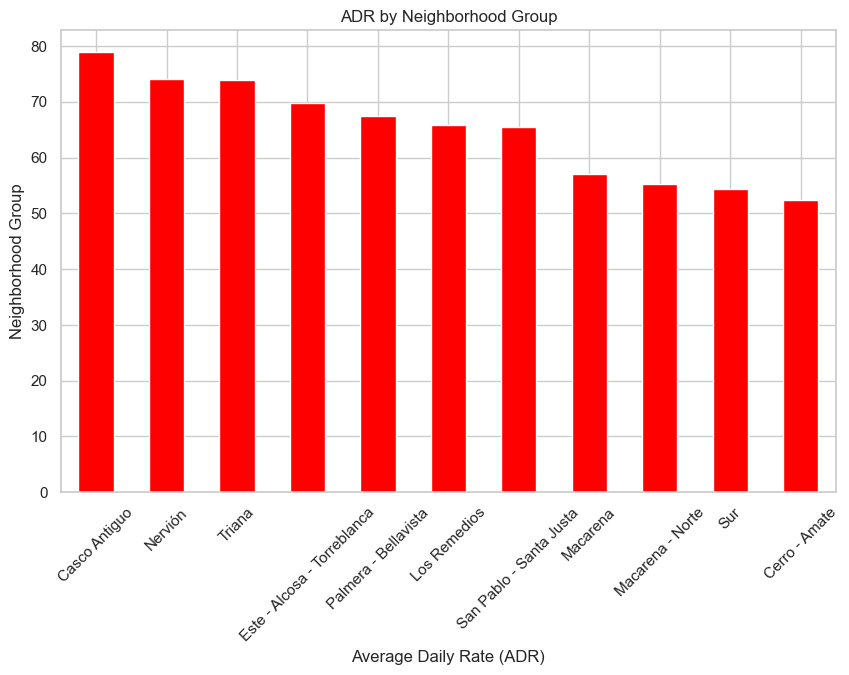

In [77]:
# Grouping by 'neighbourhood' and calculating the average occupancy rate:
avg_daily_rate = df3.groupby('neighbourhood_group')['price'].mean()

# Sorting:
avg_daily_rate_sorted = avg_daily_rate.sort_values(ascending=False)

avg_daily_rate_sorted.plot(kind='bar', figsize=(10, 6), color='red')


plt.xlabel('Average Daily Rate (ADR)')
plt.ylabel('Neighborhood Group')

plt.title('ADR by Neighborhood Group')
plt.xticks(rotation=45)
plt.show()

**Conclusions**\
The bar chart presents the average daily rates for listings accross different neighborhood groups. Some key insights are:
- The neighborhoods at the top of the chart like **Tabladilla**, **El Cano**, and **Santa Cruz**, have the highest daily rates, typically nearing or exceeding **80€ per night**. This suggest that these areas are in high demand, either due to their location, amenities, or attractiveness to visitors. Making them premium location for short-term rentals.
- Neighborhoods such as **El Cerro**, **Huerta del Pilar**, and **La Bachillera**, display daily rates of around **60€ per night**. These areas are likely in moderate demand, offering a balance between affordable and desirable characteristics for travelers.
- At the bottom of the chart, neighborhoods such as **Las Letanías**, **San Diego**, and **Avda. de la Paz**, show significant lower average daily rates, falling below **30€ per night**. These lower prices may indicate lower demand for these locations, which could be related to factors like distance from key tourist attractions, less developed infrastructure, or greater supply of available listings.

#### **5.2.3. Multivariate Analysis**

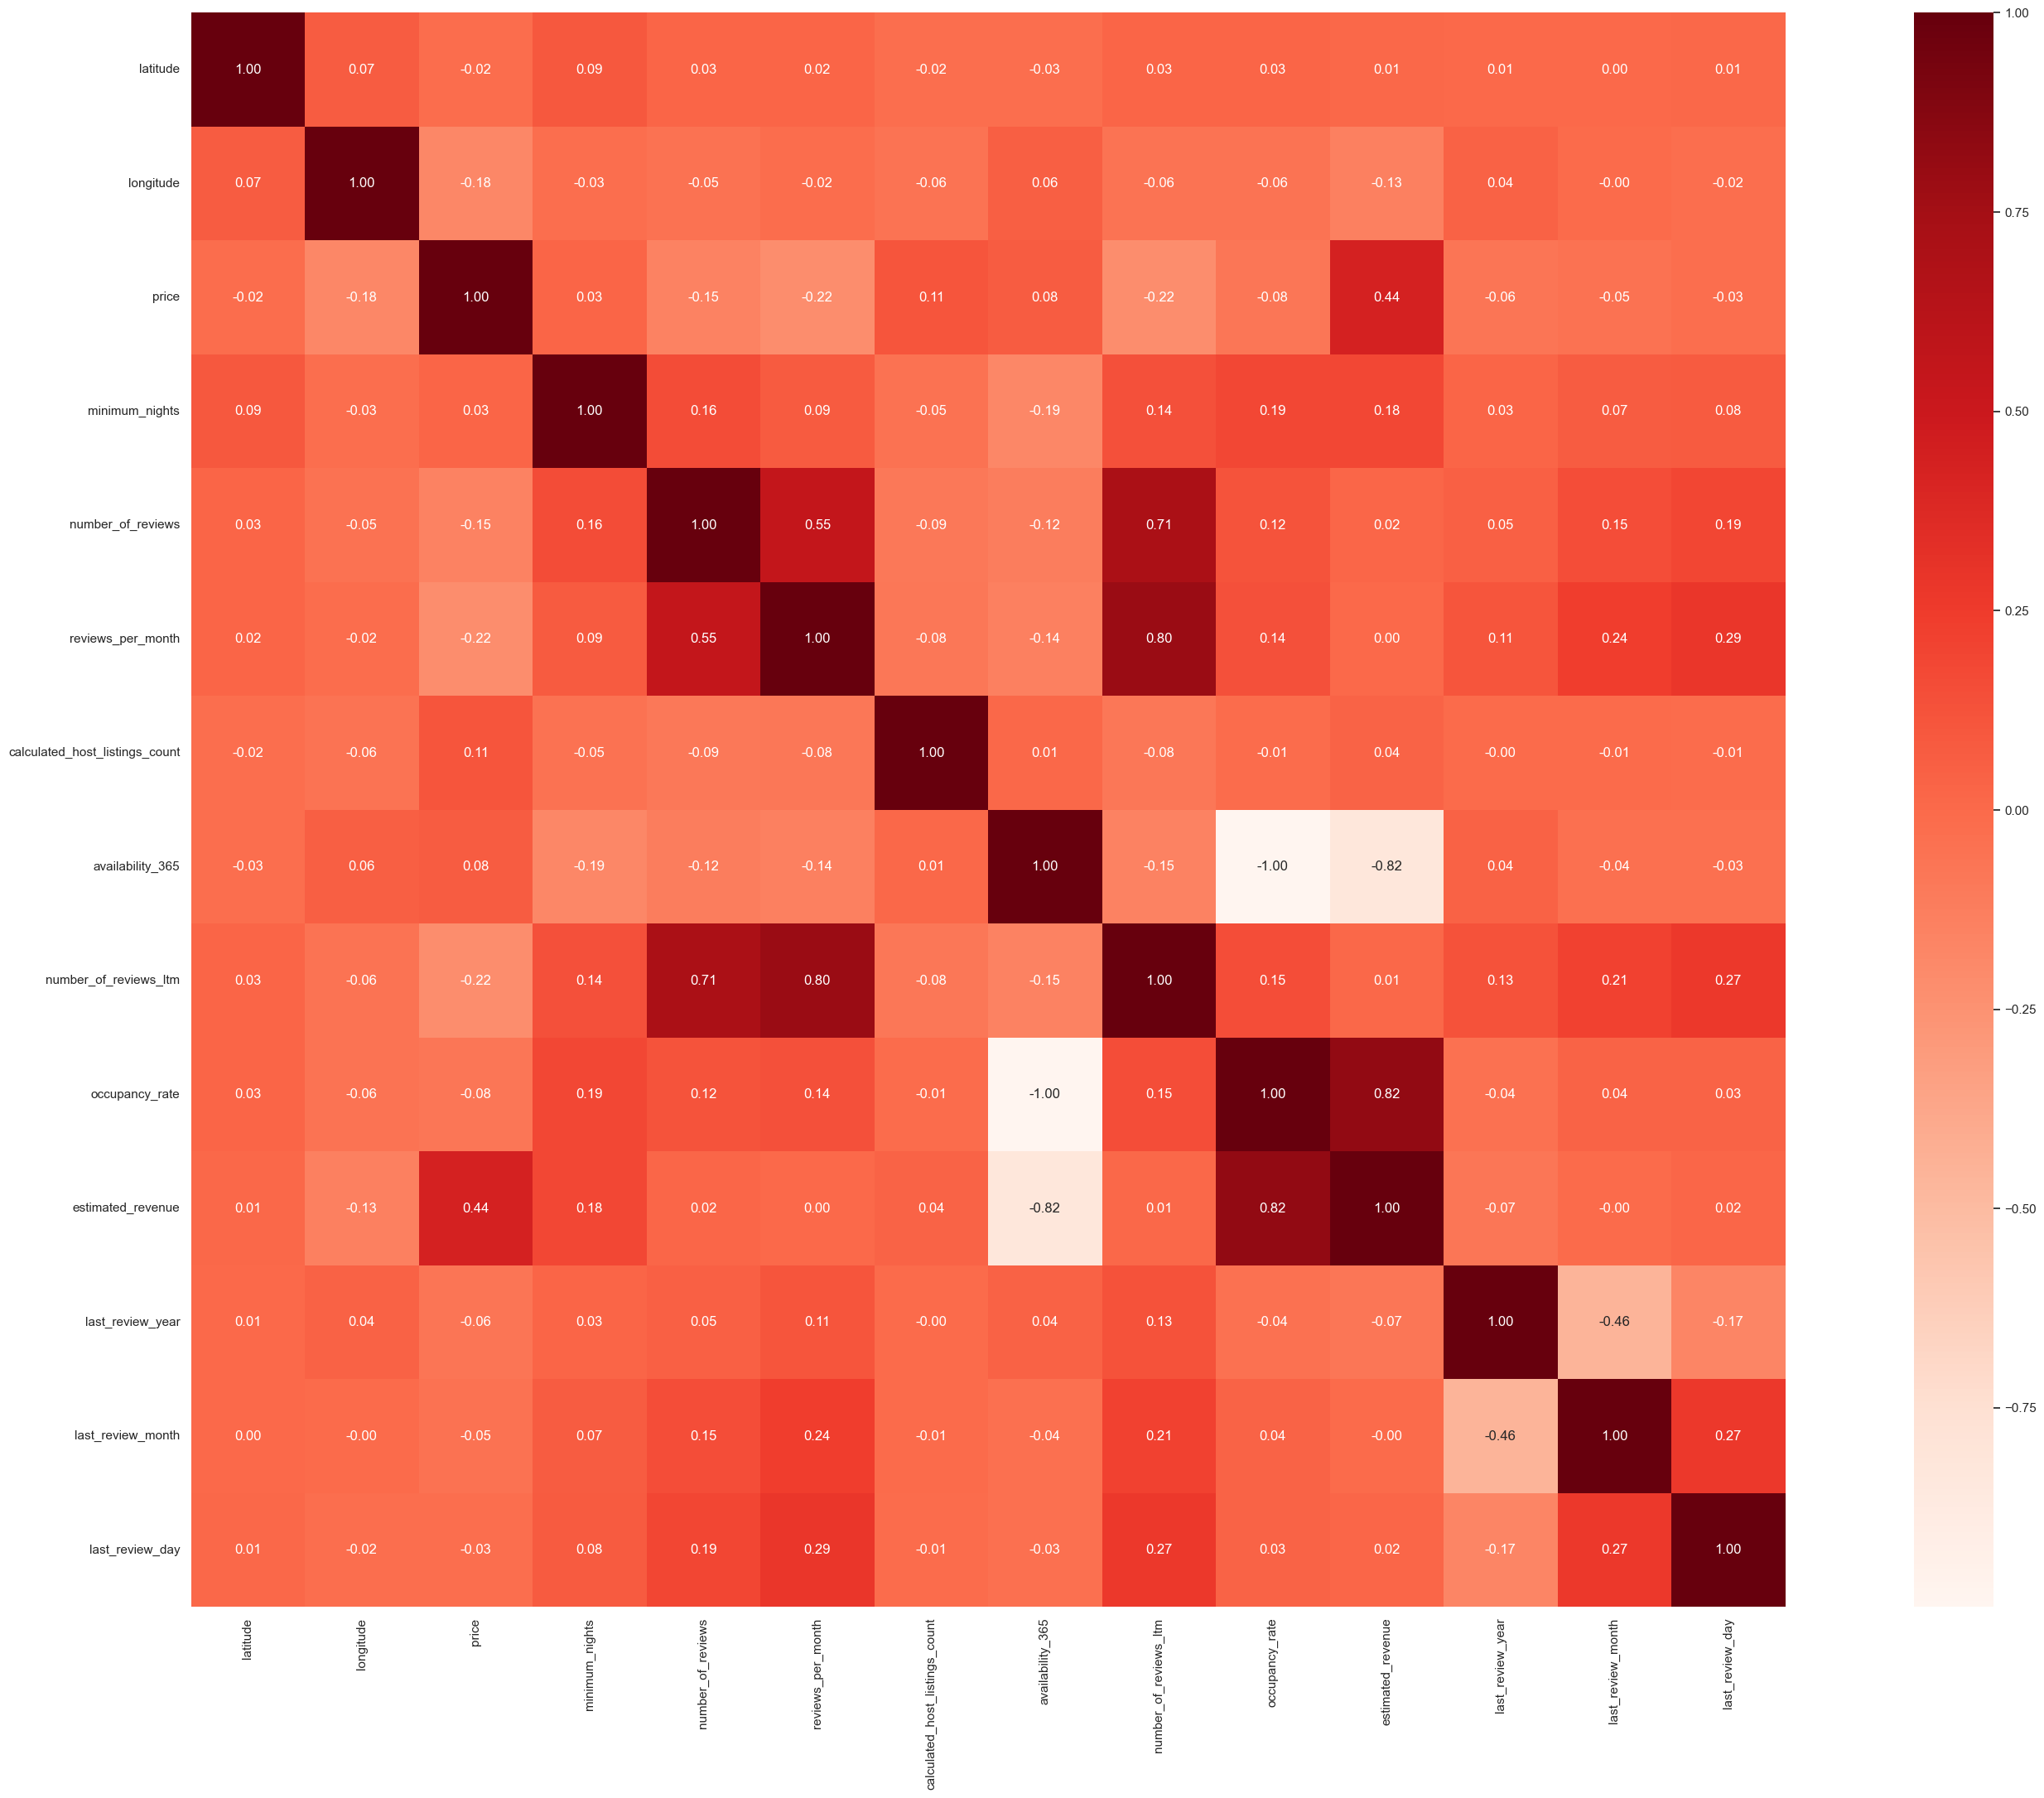

In [78]:
corr_matrix = df3[numeric_variables].corr()

# Plotting:
plt.figure(figsize=(40, 25)) 
sns.heatmap(corr_matrix, cmap='Reds', fmt='.2f', square=True, linecolor='white', annot=True)
plt.show()

There are pairs of columns with a high or perfect correlation.\
We are going to define a function that provides the list of pairs of columns with a high or perfect correlation (considering high between '0.80' and '0.99'):

In [79]:
def identifying_correlated_pairs(df3, threshold=0.8):
    """
    Identifies pairs of correlated variables in a DataFrame.

    Parameters:
    df3 (DataFrame): The input DataFrame containing numeric variables.
    threshold (float): The correlation threshold above which pairs will be considered correlated.

    Returns:
    DataFrame: A DataFrame containing pairs of correlated variables and their correlation values.
    """
    # Selecting numeric variables from the DataFrame:
    correlation = df3.select_dtypes(include='number')

    # Calculating the correlation matrix:
    corr_matrix = correlation.corr()
    
    # Creating a DataFrame to store correlated pairs:
    correlated_pairs = []

    # Iteramos sobre la matriz:
    for col in range(corr_matrix.shape[0]):
        for i in range(col+1, corr_matrix.shape[1]):
            if abs(corr_matrix.iloc[col, i]) >= threshold: # Using abs() method to consider both positive and negative correlation
                correlated_pairs.append(
                   {
                       'Column 1': corr_matrix.columns[col],
                       'Column 2': corr_matrix.columns[i],
                       'Correlation percentage': round(corr_matrix.iloc[col, i], 2)
                   } 
                )

    return correlated_pairs

In [80]:
identifying_correlated_pairs(df3, threshold=0.8)

[{'Column 1': 'availability_365',
  'Column 2': 'occupancy_rate',
  'Correlation percentage': -1.0},
 {'Column 1': 'availability_365',
  'Column 2': 'estimated_revenue',
  'Correlation percentage': -0.82},
 {'Column 1': 'occupancy_rate',
  'Column 2': 'estimated_revenue',
  'Correlation percentage': 0.82}]

**Conclusions**\
Features like 'availability_365' and 'occupancy_rate' show perfect correlation. The correlation between this pair of variables indicates that these variables are likely to measure similar events. This may imply redundancy in the data, since variables that measure practically the same thing in different ways do not provide much additional information.

Moreover, 'availability_365' and 'occupancy_rate' with 'estimated_revenue', show extremely high correlations (0.82%). This indicates that there is a strong linear relationship between these columns. Extremely high correlations can suggest redundancy in features, which could be an opportunity to reduce the dimensionality of the data without losing relevant information.

It is important to consider whether it is necessary to keep all of these variables to avoid overloading analyses with repetitive information. In our case, we would remove two columns in order to avoid redundant data for future steps like predictive modeling (for instance, we could remove 'occupancy_rate' and 'estimated_revenue' features).

## 6. Insights and Recommendations

An analysis has been carried out on the accommodations available in Seville between January and June 2024 and useful observations have been extracted for making strategic decisions by the owners of said properties. Below we list the findings:

- **1. Neighborhoods with the Best Performance:**
    - The neighborhood called *Casco Antiguo* has the largest number of properties in the city. Specifically, the *Alfalfa* sub-neighborhood has the most. Therefore, it can be considered the most popular area among visitors.
    - We suggest increasing the focus on this area that has expansion potential in surrounding neighborhoods to capitalize on the high demand. Additionally, marketing efforts could highlight the historic charm of the downtown.
    - This would mean that properties here could increase in prices due to their location, leading to higher returns.
- **2. Rental Preferences:**
    - In Seville, visitors largely opt for entire homes (which represent approximately 81% of the listings).
    - Taking these facts into account, owners who are interested in investing should prioritize the offer of complete apartments over other types of spaces. In addition, property descriptions highlight those that have privacy and comfort to satisfy tourists' preferences.
    - We also recommend to evaluate the potential for optimizing pricing strategies for private rooms to increase their attractiveness and enhance occupancy rates. For instance, offering discounts for longer stays.
    - Occupancy and customer satisfaction could increase if marketing and investment strategies are in line with demand patterns.
- **3. Price Distribution by Segment:**
    - During this period, the average price per night is around 75.02€, with a distribution skewed to the right (since most listings have a price between 60€-80€). However, neighborhoods like *Tabladilla* and *El Cano* have higher prices (from 80€ to 119€). In contrast, other neighborhoods such as *Las Letanías* or *Avda. de la Paz* have a price of less than 30€.
    - To optimize prices, it is recommended to apply dynamic pricing strategies. In prime locations, owners could adjust prices upwards during peak seasons, while in lower-demand areas they could offer discounts or improve the quality of accommodation to attract more visitors.
    - Price optimization increases both occupancy and revenue. 
- **4. Occupancy and Demand Variation:**
    - There are neighborhoods like *San Pedro C* and *Polígono Sur* that have high occupancy rates, approaching or exceeding 70%. However, there are others like *La Oliva* and *Bami* that show occupancy rates below 25%.
    - In high demand neighborhoods, we recommend increasing prices or adding value through better services. On the other hand, in areas of low demand we recommend improving marketing efforts or focusing on long-term rentals.
    - This would maximize profitability by balancing occupancy and price.
- **5. Regulation:**
    - There are up to 345 listings with "exempt" licenses. That is, a considerable portion of listings may not require traditional licenses.
    - Owners must stay up to date on regulatory changes and ensure compliance.
    - Ensuring compliance helps avoid legal issues and improves reputation among guests.
- **6. Reviews and Reputation:**
    - There are an average of 80 reviews per property, although some properties receive up to 1,157 reviews.
    - We recommend promoting the collection of guest opinions to generate credibility with potential visitors. Especially for newer properties. Additionally, offering discounts could help.
    - Clear and positive reviews improve the platform's ranking. This leads to greater visibility as well as better occupancy rates.

## 7. Assumptions and Caveats

Throughout the analysis, multiple assumptions were made to manage challenges with the data. These assumptions and caveats are noted below:

* **Missing Values:**
    * **Reviews:** For those entries where there were missing values (last review date and the total number of reviews per month), we assumed that guests did not send any reviews. Therefore, we added a future date (January 1st, 2025) and zero respectively. This made it easy to manage information during analysis.

    * **Pricing:** Missing values ​​in the price column could be because these listings were temporarily unavailable (for example, due to renovations or facility upgrades). Either the file contains errors or the data collection is incomplete. It would be necessary to consult and/or verify with the corresponding department to better understand the situation.

    * **Licenses:** Missing values ​​in the license types column could be a result of these hosts not providing the necessary documentation in a timely manner and, therefore, the data collection is incomplete. It would be necessary to consult and/or verify with the corresponding department to better understand the situation.
  
* **Data Representativeness**: The analysis presumes that the properties listed in the Airbnb Seville file between January to June 2024 represent the market during this specific period and are similar to the data from previous and subsequent months. However, we take into account that there may be fluctuation in both supply and demand due to numerous influences such as seasonal trends, local events, economic and legal conditions. All of this could impact the aforementioned findings.

* **Market Dynamics:** It is assumed that preferences for entire homes over other types of spaces represent travelers' priority consumption based on their needs and comforts. Nonetheless, it is recommended to constantly monitor this aspect as customers could change their behavior towards shorter or longer stays, or greater demand for other types of properties like hotels.

* **External Factors:** It is vital to note that influences such as local regulations, economic changes or competitive actions could directly impact prices and, therefore, occupancy rates. Hence, obtaining reviews month after month is key so that the credibility of the property is maintained over time.

## Conclusion

In summary, the Seville Airbnb market from January to June 2024 shows a strong preference for entire apartments in historic neighborhoods like *Casco Antiguo*. Pricing is largely mid-range, with privileged areas like *Santa Cruz* showing higher rates. So, in general, with a strategic dynamic pricing, targeted marketing, and property improvements, owners can maximize occupancy and profitability. As less obvious but still important points, hosts should stay up-to-date with regulations and encourage reviews which will strengthen market presence.

For a more comprehensive analysis of the Airbnb service in Seville, it is advisable to use a more detailed and extensive dataset.Incorporating features we could perform a deeper examination and provide better insights into the factors influencing accommodation options.